<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Project with Linear Regression

## PROBLEM STATEMENT

**Role:**
    
Real estate advisor in charge of predicting housing prices 
    
**Objective:** 
    
To predict housing prices for future sellers to add most value to home accurately

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
    -[2017 Data Import and Cleaning](#2017-Data-Import-and-Cleaning)
    -[2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
    -[Merge with Income](#Merge-with-Income)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## BACKGROUND

The value of every good in a market economy is based on a price discovery process. Producers and resellers propose hypothetical values and hope to find buyers with similar valuations. In contrast, consumers bid up or push down prices based on their changing interpretations of the value of goods. This process is imperfect and ever-changing. ([*source*](https://www.investopedia.com/ask/answers/072915/how-market-value-determined-real-estate-market.asp))

Hence it is crucial to come up with a one stop price prediction model to supply up-to-date insights on critical features for future sellers to add the most value to home 

In [67]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import (
    Ridge,RidgeCV,
    Lasso,LassoCV,
    ElasticNet, ElasticNetCV,
    LinearRegression
)
from sklearn.model_selection import(
    cross_val_score,
    train_test_split
)
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures
)
from sklearn.feature_selection import SelectFromModel
# pd.set_option('display.max_rows', 1000)  # or 1000
# pd.set_option('display.max_columns', 1000)  # or 1000

from itertools import combinations
from itertools import permutations

from sklearn.preprocessing import OneHotEncoder

from scipy import stats

In [68]:
kaggle_train = pd.read_csv('datasets/train.csv')
kaggle_test = pd.read_csv('datasets/test.csv')

In [69]:
kaggle_train.shape

(2051, 81)

In [70]:
kaggle_test.shape

(878, 80)

In [71]:
# rename column names 

new_columns = {
    'Id': 'id',
    'PID':'pid',
    'MS SubClass': 'ms_subclass',
    'MS Zoning': 'ms_zoning',
    'Lot Frontage': 'lot_front',
    'Lot Area': 'lot_area',
    'Street': 'street',
    'Alley':'alley',
    'Lot Shape': 'lot_shape',
    'Land Contour':'land_contour',
    'Utilities': 'util',
    'Lot Config': 'lot_config',
    'Land Slope': 'land_slope',
    'Neighborhood': 'neighborhood',
    'Condition 1': 'cond_1',    
    'Condition 2': 'cond_2',
    'Bldg Type': 'bldg_type',
    'House Style': 'house_style',
    'Overall Qual': 'overall_qual',
    'Overall Cond': 'overall_cond',
    'Year Built': 'year_built',
    'Year Remod/Add': 'year_remod_add',
    'Roof Style': 'roof_style',
    'Roof Matl': 'roof_matl',
    'Exterior 1st': 'ext_1st',
    'Exterior 2nd': 'ext_2nd',
    'Mas Vnr Type': 'mas_vnr_type',
    'Mas Vnr Area': 'mas_vnr_area',
    'Exter Qual': 'exter_qual',
    'Exter Cond': 'exter_cond',
    'Foundation': 'foundation',
    'Bsmt Qual': 'bsmt_qual',
    'Bsmt Cond': 'bsmt_cond',
    'Bsmt Exposure': 'bsmt_exposure',
    'BsmtFin Type 1': 'bsmtfin_type1',
    'BsmtFin SF 1': 'bsmtfin_sf1',
    'BsmtFin Type 2': 'bsmt_type2',
    'BsmtFin SF 2': 'bsmt_sf2',
    'Bsmt Unf SF': 'bsmt_unf_sf',
    'Total Bsmt SF': 'total_bsmt_sf',
    'Heating': 'heating',
    'Heating QC': 'heating_qc',
    'Central Air': 'central_air',
    'Electrical': 'electrical',
    '1st Flr SF': '1st_flr_sf',
    '2nd Flr SF': '2nd_flr_sf',
    'Low Qual Fin SF': 'low_qual_fin_sf',
    'Gr Liv Area': 'gr_liv_area',
    'Bsmt Full Bath': 'bsmt_full_bath',    
    'Bsmt Half Bath': 'bsmt_half_bath',
    'Full Bath': 'full_bath',
    'Half Bath': 'half_bath',
    'Bedroom AbvGr': 'bedroom_abv_gr',
    'Kitchen AbvGr': 'kitchen_abv_gr',
    'Kitchen Qual': 'kitchen_qual',
    'TotRms AbvGrd': 'tot_rms_abv_grd',
    'Functional': 'functional',
    'Fireplaces': 'fireplace',
    'Fireplace Qu': 'fireplace_qu',
    'Garage Type': 'garage_type',
    'Garage Yr Blt': 'garage_yr_blt',
    'Garage Finish': 'garage_finish',
    'Garage Cars': 'garag_cars',
    'Garage Area': 'garage_area',
    'Garage Qual': 'garage_qual',
    'Garage Cond': 'garage_cond',
    'Paved Drive': 'paved_drive',
    'Wood Deck SF': 'wood_deck_sf',
    'Open Porch SF': 'open_porch_sf',
    'Enclosed Porch': 'enclosed_porch',
    '3Ssn Porch': '3ssn_porch',
    'Screen Porch': 'screen_porch',
    'Pool Area': 'pool_area',
    'Pool QC': 'pool_qc',
    'Fence': 'fence',
    'Misc Feature': 'misc_feature',
    'Misc Val': 'misc_val',
    'Mo Sold': 'mo_sold',
    'Yr Sold': 'yr_sold',
    'Sale Type': 'sale_type',
    'SalePrice':'sale_price',
}

kaggle_train.rename(columns=new_columns, inplace=True)
kaggle_test.rename(columns=new_columns, inplace=True)

In [72]:
df = pd.concat([kaggle_train,kaggle_test], axis = 0)

In [73]:
df.shape

(2929, 81)

## EDA
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

**Clean missing values**  

In [74]:
# build list of features with na 

feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()]
for feat in feature_nan:
    print(feat, f'has {round((df[feat].isnull().mean())*100,2)}% missing values')

lot_front has 16.73% missing values
alley has 93.24% missing values
mas_vnr_type has 0.79% missing values
mas_vnr_area has 0.79% missing values
bsmt_qual has 2.73% missing values
bsmt_cond has 2.73% missing values
bsmt_exposure has 2.83% missing values
bsmtfin_type1 has 2.73% missing values
bsmtfin_sf1 has 0.03% missing values
bsmt_type2 has 2.77% missing values
bsmt_sf2 has 0.03% missing values
bsmt_unf_sf has 0.03% missing values
total_bsmt_sf has 0.03% missing values
electrical has 0.03% missing values
bsmt_full_bath has 0.07% missing values
bsmt_half_bath has 0.07% missing values
fireplace_qu has 48.55% missing values
garage_type has 5.36% missing values
garage_yr_blt has 5.43% missing values
garage_finish has 5.43% missing values
garag_cars has 0.03% missing values
garage_area has 0.03% missing values
garage_qual has 5.43% missing values
garage_cond has 5.43% missing values
pool_qc has 99.56% missing values
fence has 80.47% missing values
misc_feature has 96.38% missing values
sal

**Some missing values are bigger percentage than the other** 

- we need to find the correlation between the missing values and the sales price to judge if its good to remove or to keep

**Approach**

1) Larger values - might remove or place median/mode

2) Smaller values - need to conduct EDA and decide later

In [75]:
df = df.reset_index()

In [76]:
df.head()

,index,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
0,0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500.0
1,1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000.0
2,2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000.0
3,3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000.0
4,4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500.0


69.19967199671997
68.0


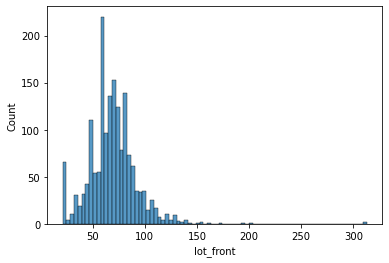

In [77]:
# Lot_font has normal distrubtion centered across mean of 69

sns.histplot(x = 'lot_front', data =kaggle_train)
print(df['lot_front'].mean())
print(df['lot_front'].median())

10065.20819112628
9430.0


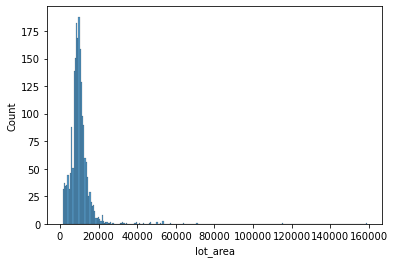

In [78]:
# lot area right skewed 

sns.histplot(x = 'lot_area', data =kaggle_train)
print(kaggle_train['lot_area'].mean())
print(kaggle_train['lot_area'].median())

In [79]:
# get mean and fill into NA for individual data set
indexer = df.shape[0] - len(df[pd.isnull(df['sale_price'])])
print(f'Indexer: {indexer}')
df.iloc[indexer:]['lot_front'].fillna(kaggle_test['lot_front'].mean(),inplace = True)   # test
df.iloc[:indexer]['lot_front'].fillna(kaggle_train['lot_front'].mean(),inplace = True)  # train

Indexer: 2051


69.2023113396539
69.05520046484602


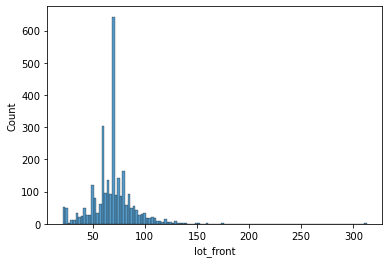

In [80]:
# Lot_font has normal distrubtion centered across mean of 69

sns.histplot(x = 'lot_front', data =df)
print(df['lot_front'].mean())
print(df['lot_front'].median())

In [81]:
# change 'nan' to NoAlleyAccess
df['alley'] = df['alley'].map(lambda x: 'NoAlley' if pd.isnull(x) else x)

<AxesSubplot:xlabel='alley', ylabel='sale_price'>

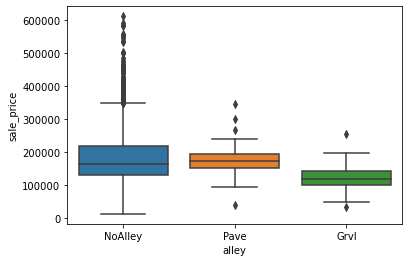

In [82]:
# no meaning to the sales 
# drop alley

sns.boxplot(
    data = df,
    x = 'alley',
    y = 'sale_price'
)

Boxplot shows strong outliers in NoAlley

In [83]:
# mas_vnr_type -->> categorical, insert most common type 
df.groupby(by='mas_vnr_type').count()['id']

mas_vnr_type
BrkCmn       25
BrkFace     880
CBlock        1
None       1752
Stone       248
Name: id, dtype: int64

mas_vnr_type already has a None column. Will need to classify nan into the mode of the types for minimal impact


In [84]:
# fill missing values with mode of mas_vnr_type
indexer = df.shape[0] - len(df[pd.isnull(df['sale_price'])])
print(f'Indexer: {indexer}')
df.iloc[indexer:]['mas_vnr_type'].fillna(kaggle_test['mas_vnr_type'].mode()[0],inplace = True) # test
df.iloc[:indexer]['mas_vnr_type'].fillna(kaggle_train['mas_vnr_type'].mode()[0],inplace = True)# train

Indexer: 2051


(0.0, 600.0)

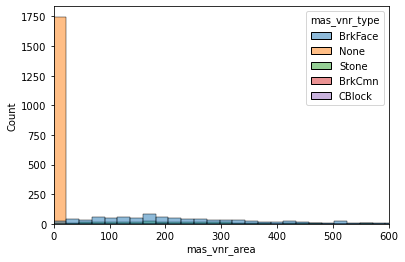

In [85]:
# checked categories for mas_vnr_area
# found if mas vnr area == 0, then belongs to none
sns.histplot(x = 'mas_vnr_area', hue = 'mas_vnr_type', data =df)
plt.xlim(0,600)

<AxesSubplot:xlabel='mas_vnr_type', ylabel='sale_price'>

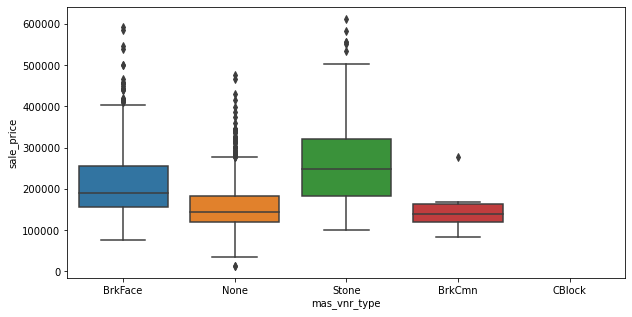

In [86]:
# checking nominal category: mas_vnr_type against sale price

plt.figure(figsize=(10,5))
sns.boxplot(
    x = 'mas_vnr_type',
    y = 'sale_price',
    data = df
)

In [87]:
# create dictionary that stores mean of mas_dict_mean
mas_dict_train_mean = {key:val for key, val in kaggle_train.groupby(['mas_vnr_type'])['mas_vnr_area'].mean().iteritems()}
mas_dict_train_mean

{'BrkCmn': 194.0,
 'BrkFace': 254.63015873015874,
 'None': 0.5213464696223317,
 'Stone': 230.41071428571428}

In [88]:
# create dictionary that stores mean of mas_dict_mean
mas_dict_test_mean = {key:val for key, val in kaggle_test.groupby(['mas_vnr_type'])['mas_vnr_area'].mean().iteritems()}
mas_dict_test_mean

{'BrkCmn': 197.08333333333334,
 'BrkFace': 279.328,
 'CBlock': 198.0,
 'None': 1.1179775280898876,
 'Stone': 252.2125}

In [89]:
# create function that returns mean based on mas_dict_mean if column has null values 
def enter_area(col):
    area = col[0]
    mas_type = col[1]
    sale = col[2]
    if (pd.isnull(area) & pd.isnull(sale)):
        return mas_dict_test_mean[mas_type]
    elif (pd.isnull(area) & pd.notnull(sale)):
        return mas_dict_train_mean[mas_type]
    else:
        return area

In [90]:
# fill in null values for -->> mas_vnr_area
indexer = df.shape[0] - len(df[pd.isnull(df['sale_price'])])
print(f'Indexer: {indexer}')
df.iloc[indexer:]['mas_vnr_area']= df.iloc[indexer:][['mas_vnr_area', 'mas_vnr_type', 'sale_type']].apply(enter_area, axis = 1)   # test
df.iloc[:indexer]['mas_vnr_area']= df.iloc[:indexer][['mas_vnr_area', 'mas_vnr_type', 'sale_type']].apply(enter_area, axis = 1)  # train

Indexer: 2051


In [91]:
# missing values seems common across about bsmt columns 
df[df['bsmt_exposure'].isnull()]

,index,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
12,12,807,906226060,70,RL,120.000000,26400,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,6,2009,WD,131000.0
93,93,811,906226100,90,RL,64.000000,7018,Pave,NoAlley,Reg,...,0,0,NaN,GdPrv,NaN,0,6,2009,WD,118858.0
114,114,781,905228050,20,RL,69.055200,9000,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,6,2009,WD,63900.0
146,146,888,908128060,85,RL,64.000000,7301,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,198500.0
183,183,1554,910251050,20,A (agr),80.000000,14584,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,13100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,621,808,906226070,90,RL,64.000000,7018,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,6,2009,WD,NaN
2676,625,1818,531477040,90,RH,60.000000,8400,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,10,2007,WD,NaN
2705,654,1220,534451080,20,RL,69.545961,6627,Pave,NoAlley,IR1,...,0,0,NaN,NaN,NaN,0,7,2008,WD,NaN
2753,702,552,531475220,90,RL,75.000000,8250,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,5,2009,WD,NaN


,bsmtfin_sf1,bsmt_sf2,bsmt_unf_sf,total_bsmt_sf,sale_price
sale_price,0.423519,0.016255,0.190210,0.628925,1.000000
total_bsmt_sf,0.533588,0.090784,0.412171,1.000000,0.628925
bsmtfin_sf1,1.000000,-0.053876,-0.480213,0.533588,0.423519
bsmt_unf_sf,-0.480213,-0.238569,1.000000,0.412171,0.190210
bsmt_sf2,-0.053876,1.000000,-0.238569,0.090784,0.016255


<Figure size 1080x1080 with 0 Axes>

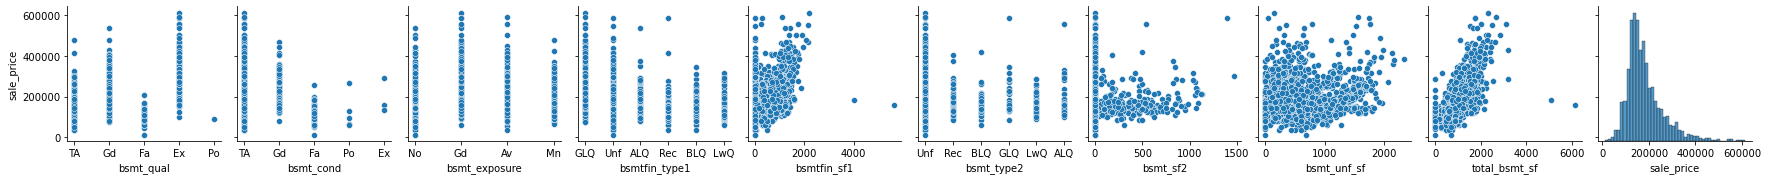

In [92]:
# create pairplot to check relationship between all bsmt parameters against sale_price
# noticed only total_basement_sf and  area has high correlation with sale_price
# checked only 58 out of 2051 data has NAN -->> meaning no basement 
# will want to change all null to 'NoBsmt'

plt.figure(figsize=(15,15))
sub_bsmt = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'sale_price']

sns.pairplot(
    df,
    x_vars = sub_bsmt,
    y_vars = ['sale_price'],
    
);

# create and sort dataframe based on correlation with basement area vs price 
df[sub_bsmt].corr().sort_values(by = 'sale_price', ascending = False)

In [93]:
# Create none category for those without basement
df['bsmt_cond'].fillna('NoBsmt',inplace = True)

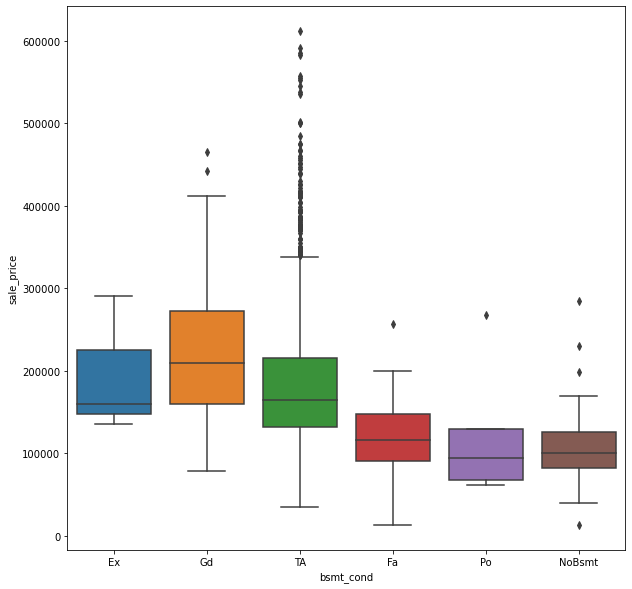

In [94]:
#plot bigger figure size
plt.figure(figsize=(10,10))
# cross check category, makes sense that those without basement will have lowest mean sale price 
sns.boxplot(
    x = 'bsmt_cond',
    y = 'sale_price',
    data = df.iloc[:indexer],
    order = ['Ex','Gd', 'TA', 'Fa', 'Po', 'NoBsmt']
);

In [95]:
# Create none category for those without basement
df['bsmt_type2'].fillna('NoBsmt',inplace = True)

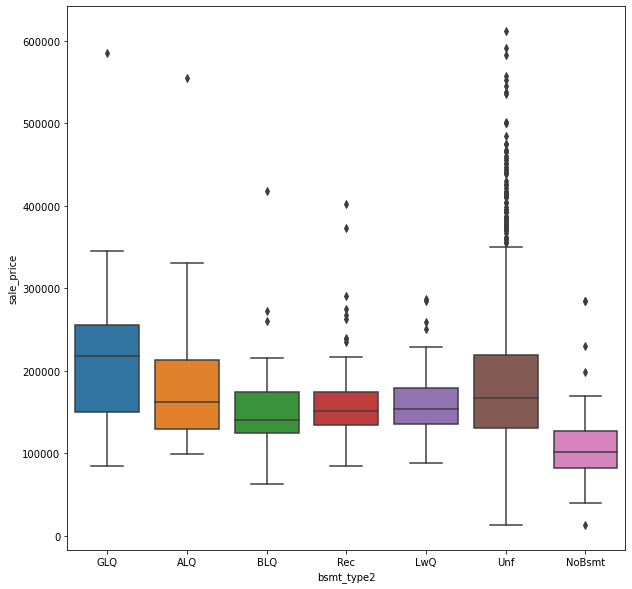

In [96]:
#plot bigger figure size
plt.figure(figsize=(10,10))
# notice higher prices are under unfinised. 
# no basement is the lowest mean score, which fits the ordinal flow. 

sns.boxplot(
    x = 'bsmt_type2',
    y = 'sale_price',
    data = df.iloc[:indexer],
    order = ['GLQ', 'ALQ','BLQ','Rec','LwQ','Unf','NoBsmt']
);

In [97]:
# Create none category for those without basement
df['bsmt_exposure'].fillna('NoBsmt',inplace = True)

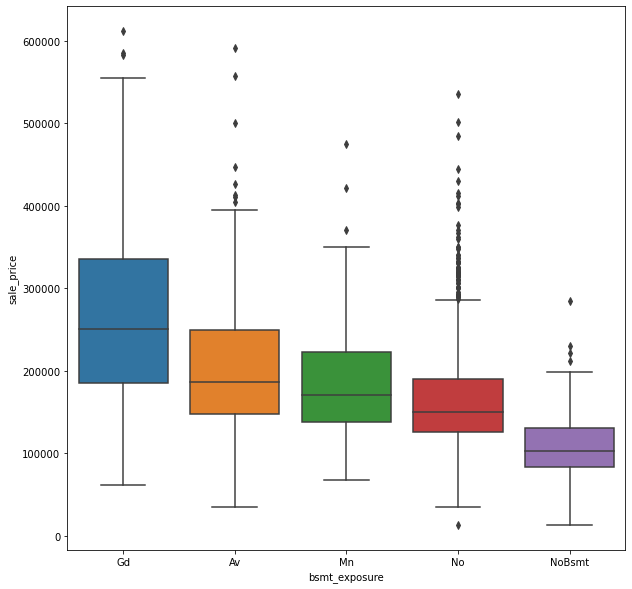

In [98]:
#plot bigger figure size
plt.figure(figsize=(10,10))
# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmt_exposure',
    y = 'sale_price',
    data = df.iloc[:indexer],
    order = ['Gd','Av','Mn','No','NoBsmt']
);

In [99]:
# fill up null values with NoBsmt
df['bsmt_qual'].fillna('NoBsmt', inplace = True)

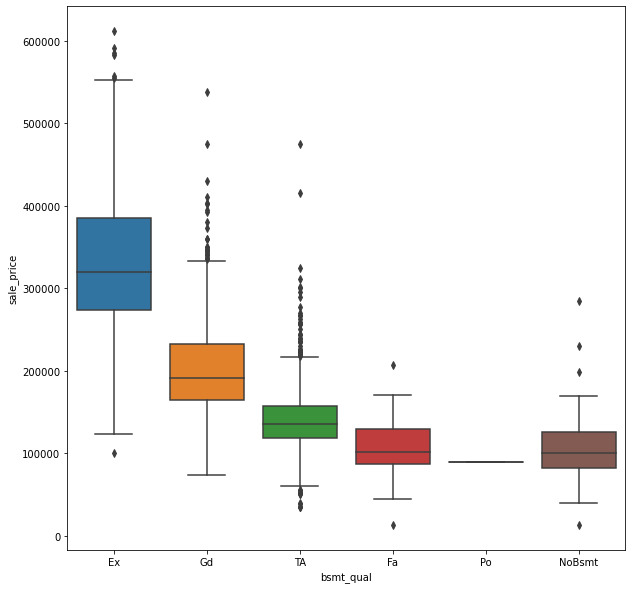

In [100]:
#plot bigger figure size
plt.figure(figsize=(10,10))
# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmt_qual',
    y = 'sale_price',
    data = df.iloc[:indexer],
    order = ['Ex','Gd', 'TA', 'Fa', 'Po', 'NoBsmt']
);



**Seeing small points for Po** 
- might need to remove it if want to use this variable as it might skew predicted data inaccurately during feature engineering

In [101]:
# fill up null values with NoBsmt
df['bsmtfin_type1'].fillna('NoBsmt', inplace = True) 

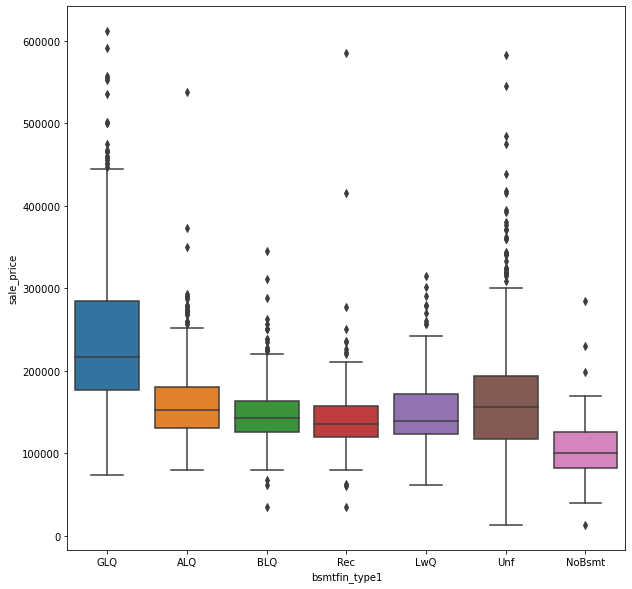

In [102]:
#plot bigger figure size
plt.figure(figsize=(10,10))

# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmtfin_type1',
    y = 'sale_price',
    data = df.iloc[:indexer],
    order = ['GLQ', 'ALQ','BLQ','Rec','LwQ','Unf','NoBsmt']
);

In [103]:
# checked row has no basement
df[df['total_bsmt_sf'].isnull()]

,index,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
1327,1327,1342,903230120,20,RM,99.0,5940,Pave,NoAlley,IR1,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000.0


In [104]:
# replace na with 0 feet square

df['bsmtfin_sf1'].fillna(0, inplace = True) 
df['bsmt_sf2'].fillna(0, inplace = True) 
df['total_bsmt_sf'].fillna(0, inplace = True) 
df['bsmt_unf_sf'].fillna(0, inplace = True) 

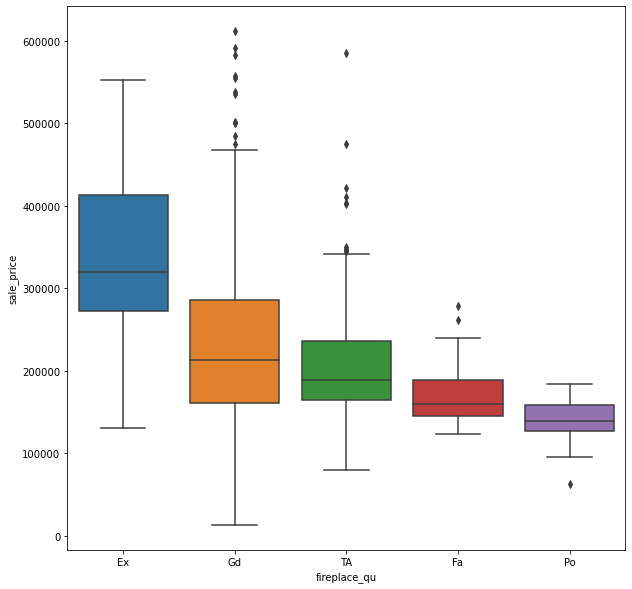

In [105]:
# Establish size of figure.
plt.figure(figsize = (10,10))
# ordinal relationship is strong against price 
sns.boxplot(
    x = 'fireplace_qu',
    y = 'sale_price',
    data = df.iloc[:indexer],
    order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
);

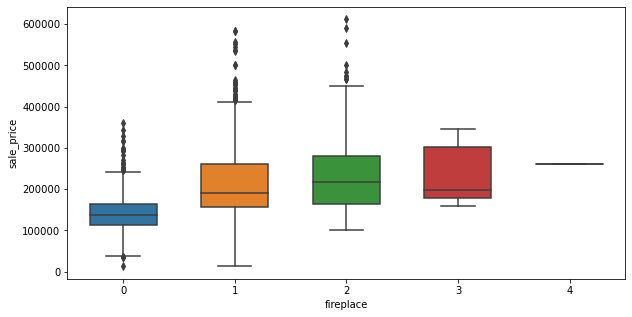

In [106]:
# Establish size of figure.
plt.figure(figsize = (10,5))
# creaste boxplot for fireplace 
sns.boxplot(
    x = 'fireplace',
    y = 'sale_price',
    data = df.iloc[:indexer],
    width = 0.6
);

In [107]:
df.groupby('fireplace')['fireplace'].count()

fireplace
0    1422
1    1273
2     221
3      12
4       1
Name: fireplace, dtype: int64

**Comment**
- Observed rating 4 having only one point, might need to remove this variable if need to use as results might be skewed

In [108]:
# null values contain sale price mean close to 144000
df[df['fireplace_qu'].isnull()].agg(['mean', 'median'])['sale_price']

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


mean      142001.103
median    136500.000
Name: sale_price, dtype: float64

In [109]:
# mean of null values are the same as PO the lowest ordinal rank 
df.groupby(['fireplace_qu']).agg(['mean', 'median', 'count'])['sale_price']

,mean,median,count
fireplace_qu,,,
Ex,331481.483871,320000.0,31
Fa,170287.203390,159500.0,59
Gd,233578.388145,213490.0,523
Po,139263.967742,139000.0,31
TA,204893.621622,188500.0,407


In [110]:
# fill na with NoFireplace
df['fireplace_qu'] = df['fireplace_qu'].fillna('NoFireplace')

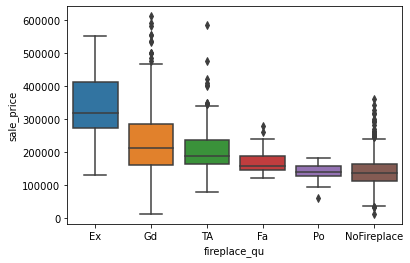

In [111]:
# cross checked ordinally correct for nofireplace
sns.boxplot(
    x = 'fireplace_qu',
    y = 'sale_price',
    data = df,
    order = ['Ex', 'Gd', 'TA', 'Fa', 'Po','NoFireplace'],
);

**Comment**
- Can see alot of outliers in Gd, TA, and Po (after adding NAN) inside. Correlation or ordinal relationship is strong against sale price

,garage_yr_blt,garag_cars,garage_area,sale_price
sale_price,0.533922,0.648220,0.650270,1.000000
garage_area,0.554731,0.889572,1.000000,0.650270
garag_cars,0.586477,1.000000,0.889572,0.648220
garage_yr_blt,1.000000,0.586477,0.554731,0.533922


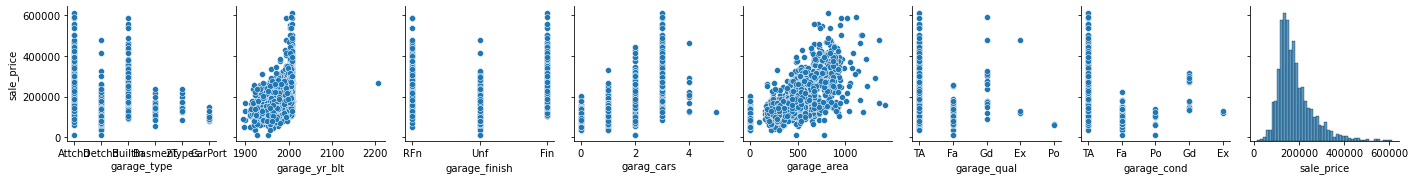

In [112]:
# creating pairplot garage variables against sale price
sns.pairplot(
    y_vars = 'sale_price',
    x_vars = ['garage_type',
    'garage_yr_blt', 'garage_finish', 'garag_cars', 'garage_area',
    'garage_qual', 'garage_cond','sale_price'],
    data = df
)

# create and sort dataframe based on correlation with garage vs price 
# most numerical categories are quite correlated with sale price 
# wont drop these columns 

df[['garage_type',
    'garage_yr_blt', 'garage_finish', 'garag_cars', 'garage_area',
    'garage_qual', 'garage_cond','sale_price']].corr().sort_values(by = 'sale_price', ascending = False)

In [113]:
# fill in None for now, might drop categorical columns if need to refine model

df['garage_type'] = df['garage_type'].fillna('NoGarage')
df['garage_finish'] = df['garage_finish'].fillna('NoGarage')
df['garage_qual'] = df['garage_qual'].fillna('NoGarage')
df['garage_cond'] = df['garage_cond'].fillna('NoGarage')

indexer = df.shape[0] - len(df[pd.isnull(df['sale_price'])])
print(f'Indexer: {indexer}')
df.iloc[indexer:]['garag_cars'].fillna(kaggle_test['garag_cars'].mode()[0],inplace = True) # test
df.iloc[:indexer]['garag_cars'].fillna(kaggle_train['garag_cars'].mode()[0],inplace = True)# train

df.iloc[indexer:]['garage_area'].fillna(kaggle_test['garage_area'].mean(),inplace = True) # test
df.iloc[:indexer]['garage_area'].fillna(kaggle_train['garage_area'].mean(),inplace = True)# train

# drop garage year built as null values cannot be replaced, it cannot be replaced by any random values or mean too. 

df.drop(columns = ['garage_yr_blt'], inplace = True)

Indexer: 2051


In [114]:
# noticed when pool area ==0, other categories also null 

df[df['pool_area'] == 0]

,index,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
0,0,109,533352170,60,RL,69.0552,13517,Pave,NoAlley,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500.0
1,1,544,531379050,60,RL,43.0000,11492,Pave,NoAlley,IR1,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000.0
2,2,153,535304180,20,RL,68.0000,7922,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000.0
3,3,318,916386060,60,RL,73.0000,9802,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000.0
4,4,255,906425045,50,RL,82.0000,14235,Pave,NoAlley,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,873,1662,527377110,60,RL,80.0000,8000,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,NaN
2925,874,1234,535126140,60,RL,90.0000,14670,Pave,NoAlley,Reg,...,0,0,NaN,MnPrv,NaN,0,8,2008,WD,NaN
2926,875,1373,904100040,20,RL,55.0000,8250,Pave,NoAlley,Reg,...,0,0,NaN,NaN,NaN,0,8,2008,WD,NaN
2927,876,1672,527425140,20,RL,60.0000,9000,Pave,NoAlley,Reg,...,0,0,NaN,GdWo,NaN,0,5,2007,WD,NaN


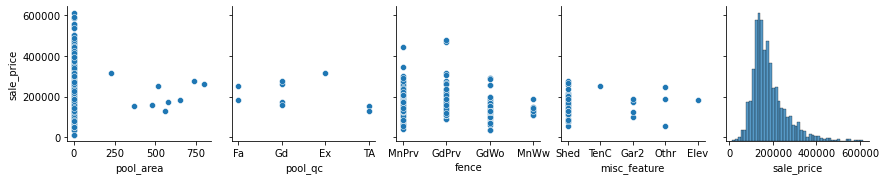

In [115]:
# too little points to do correlation for pool area 

sns.pairplot(
    x_vars = ['pool_area', 'pool_qc', 'fence', 'misc_feature', 'sale_price'],
    y_vars = 'sale_price',
    data = df.iloc[:indexer]
)

In [116]:
# drop all pool columns 

drop_pool_list = ['pool_qc', 'fence', 'misc_feature']

df = df.drop(columns = drop_pool_list, axis = 1)

<AxesSubplot:xlabel='year_built', ylabel='sale_price'>

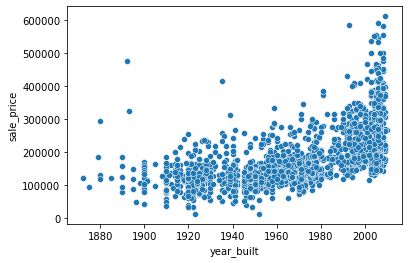

In [117]:
# seeing decreasing trend, and exceptionally high cost built recently 
sns.scatterplot(
    x = 'year_built',
    y = 'sale_price',
    data = df.iloc[:indexer]
)

In [118]:
# changing year to datetime 

year = ['year_built','year_remod_add', 'yr_sold']
for y in year:
    pd.to_datetime(df[y])
    
change_to_age = ['year_built','year_remod_add', 'yr_sold']   
for y in change_to_age:
    df[y] = df['yr_sold'] - df[y] 
    
df = df.rename(columns = {'year_built': 'age', 'year_remod_add': 'remod_age'})

df.drop(columns = 'yr_sold', inplace = True)

In [119]:
df['gr_liv_area_class'] = df['gr_liv_area'].map(lambda x: 1 if x > 2600 else 0)

In [120]:
# assign 0 to bsmt_full_bath since no basement 
df.loc[df['bsmt_full_bath'].isnull(), 'bsmt_full_bath'] = 0
# assign 0 to bsmt_half_bath since no basement 
df.loc[df['bsmt_half_bath'].isnull(), 'bsmt_half_bath'] = 0

In [121]:
# assign to the most common types for electrical
df.iloc[indexer:]['electrical'].fillna(kaggle_test['electrical'].mode()[0],inplace = True) # test

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

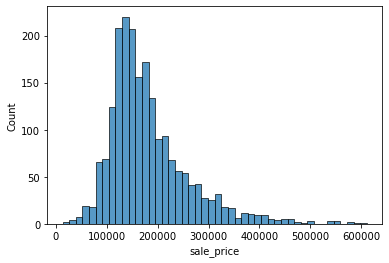

In [122]:
sns.histplot(x = 'sale_price', data = df)

In [123]:
# creating another set of classifiers for sale price for analysis
# need to remove during fitting 
df['sale_price_classified'] = df['sale_price'].apply(lambda x: 2 if x > 450000 else 1 if ((x < 450000) & (x > 300000)) else 0)

<AxesSubplot:xlabel='total_bsmt_sf', ylabel='Count'>

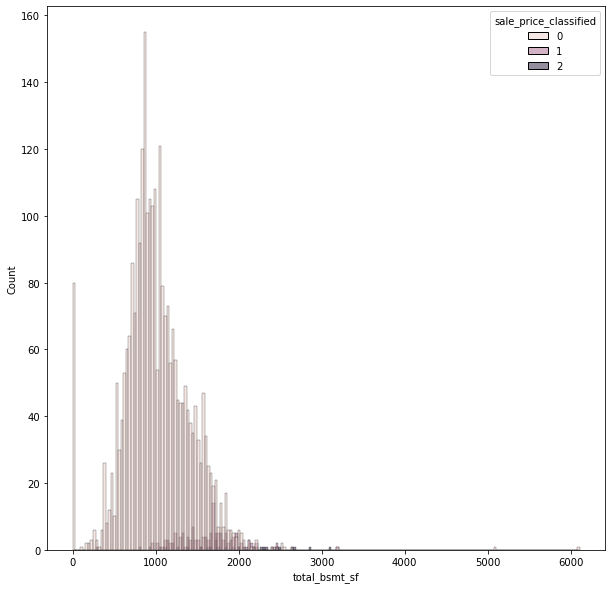

In [124]:
#finding cut off for total_bsmt_sf_class
plt.figure(figsize=(10,10))
sns.histplot(x = 'total_bsmt_sf', data = df, hue = 'sale_price_classified', bins =200)

# plt.xlim(1000,3000)

In [125]:
df.groupby('sale_price_classified')['total_bsmt_sf'].mean()

sale_price_classified
0    1013.212220
1    1622.128571
2    2060.782609
Name: total_bsmt_sf, dtype: float64

In [126]:
df['total_bsmt_sf_class'] = df['total_bsmt_sf'].map(lambda x: 1 if x > 1700 else 0)

<AxesSubplot:xlabel='neighborhood', ylabel='Count'>

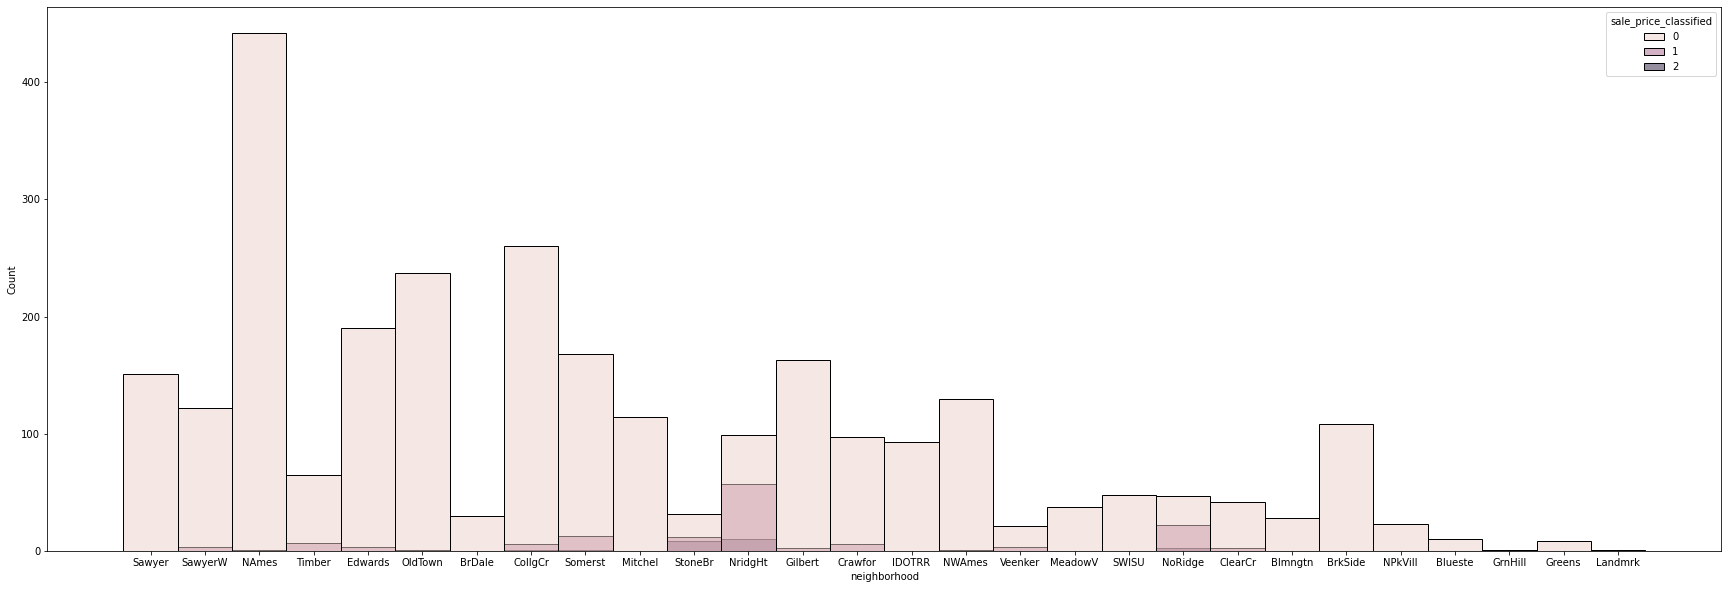

In [127]:
plt.figure(figsize=(30,10))
sns.histplot(x = 'neighborhood', data = df, hue = 'sale_price_classified')

# plt.xlim(1000,3000)

In [128]:
# These are the top 5 neighbourhood with relatively more expensive houses

test = df.loc[:,['sale_price_classified', 'neighborhood']]

pd.pivot_table(test, values = 'sale_price_classified', index = ['neighborhood']).sort_values(by = 'sale_price_classified', ascending = False).head(5)

,sale_price_classified
neighborhood,
StoneBr,0.549020
GrnHill,0.500000
NridgHt,0.463855
NoRidge,0.366197
Veenker,0.125000


In [129]:
# make new column to exclude the rest of neighbourhood as 0 and Northridge Heights, Stone Brook and Northridge having 1 

df['neighborhood_class'] = df['neighborhood'].map(lambda x: 1 if x in ['StoneBr', 'NridgHt', 'NoRidge', 'GrnHill'] else 0)

**comments**
1) Northridge Heights, Stone Brook, Northridge and GrnHill has majority high sale price housing


## Exploratory Data Analysis

In [130]:
# What are the most expensive neighborhoods in terms of mean
pd.DataFrame(kaggle_train.groupby('neighborhood').mean()['sale_price']).sort_values(by = 'sale_price', ascending = False).head(5)

,sale_price
neighborhood,
StoneBr,329675.736842
NridgHt,322831.352459
NoRidge,316294.125000
GrnHill,280000.000000
Veenker,253570.588235


In [131]:
# what is most correlated to sale price 
# noticed there might be collinear features like garage area and cars 

pd.DataFrame(df.corr()['sale_price']).sort_values(by = 'sale_price', ascending = False).head(10)

,sale_price
sale_price,1.000000
overall_qual,0.800207
sale_price_classified,0.746218
gr_liv_area,0.697038
garage_area,0.650246
garag_cars,0.648128
total_bsmt_sf,0.629303
1st_flr_sf,0.618486
neighborhood_class,0.599694
full_bath,0.537969


**Checking interaction terms**

In [132]:
# poly transform all variables 

permutate_df = df.copy() 
features = [col for col in df.columns if df[col].dtype != 'O']
X = permutate_df.iloc[:indexer][[col for col in df.columns if df[col].dtype != 'O']]
poly = PolynomialFeatures(include_bias=False, degree = 2)
X_poly = poly.fit_transform(X)

permutate_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(features))

permutate_df

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names_out'

In [ ]:
# create correlation dataframe
corr_df = pd.DataFrame(permutate_df.corr()['sale_price'])

# remove null 
corr_df = corr_df[corr_df.notnull()]

# rename col to combi 
corr_df= corr_df.reset_index()
corr_df.rename(columns = {'index': 'combi'}, inplace = True)

# filter those with correlation to sale price (from two separate features, filter those that are squared)
corr_df['filter_sale_price'] = corr_df['combi'].map(lambda x: 1 if 'sale_price' in x else 0)
corr_df = corr_df[corr_df['filter_sale_price'] == 0]

# split combi column into list
corr_df['combi'] = corr_df['combi'].apply(lambda x: x.split(' '))

# v1 represents first col in the list from combi
corr_df['v1'] = corr_df['combi'].apply(lambda x: x[0])

# v1 represents second col in the list from combi
corr_df['v2'] = corr_df['combi'].apply(lambda x: x[1] if len(x)>1 else 0)

In [ ]:
corr_df.tail(5)

,combi,sale_price,filter_sale_price,v1,v2
937,"[gr_liv_area_class, total_bsmt_sf_class]",0.265805,0,gr_liv_area_class,total_bsmt_sf_class
938,"[gr_liv_area_class, neighborhood_class]",0.380704,0,gr_liv_area_class,neighborhood_class
942,[total_bsmt_sf_class^2],0.501318,0,total_bsmt_sf_class^2,0
943,"[total_bsmt_sf_class, neighborhood_class]",0.499736,0,total_bsmt_sf_class,neighborhood_class
944,[neighborhood_class^2],0.599694,0,neighborhood_class^2,0


In [ ]:
# create temporary correlation df againt sale price only 

df_temp = pd.DataFrame(df.corr()['sale_price'])

df_temp = df_temp.reset_index()
df_temp = df_temp.rename(columns = {'index' : 'v1'})

# merge v1 correlation and rename 
corr_df = corr_df.merge(df_temp,how= 'inner', on='v1')
corr_df.rename(columns = {'sale_price_y': 'v1_corr'}, inplace = True)

In [ ]:
# rename df_temp

df_temp = df_temp.rename(columns = {'v1' : 'v2'})
corr_df = corr_df.merge(df_temp,how= 'inner', on='v2')
corr_df.rename(columns = {'sale_price': 'v2_corr', 'sale_price_x':'combi_corr'}, inplace = True)

# drop filter_sale_price
corr_df = corr_df.drop(columns = 'filter_sale_price')

In [ ]:
# Checking outlook of correlation table 

corr_df.sort_values(by = 'combi_corr', ascending = False).head(20)

,combi,combi_corr,v1,v2,v1_corr,v2_corr
159,"[overall_qual, gr_liv_area]",0.837152,overall_qual,gr_liv_area,0.800207,0.697038
357,"[overall_qual, garag_cars]",0.820239,overall_qual,garag_cars,0.800207,0.648128
384,"[overall_qual, garage_area]",0.813508,overall_qual,garage_area,0.800207,0.650246
306,"[overall_qual, tot_rms_abv_grd]",0.795420,overall_qual,tot_rms_abv_grd,0.800207,0.504014
369,"[gr_liv_area, garag_cars]",0.793317,gr_liv_area,garag_cars,0.697038,0.648128
111,"[overall_qual, 1st_flr_sf]",0.792151,overall_qual,1st_flr_sf,0.800207,0.618486
97,"[overall_qual, total_bsmt_sf]",0.768630,overall_qual,total_bsmt_sf,0.800207,0.629303
365,"[total_bsmt_sf, garag_cars]",0.767457,total_bsmt_sf,garag_cars,0.629303,0.648128
366,"[1st_flr_sf, garag_cars]",0.760294,1st_flr_sf,garag_cars,0.618486,0.648128
216,"[overall_qual, full_bath]",0.756694,overall_qual,full_bath,0.800207,0.537969


In [ ]:
# Adding percentage change after interaction with two features agains sale_price

corr_df['prct_inc_interaction'] = 100 * (abs(corr_df['combi_corr']) - ( (abs(corr_df['v1_corr']) + abs(corr_df['v2_corr']) ) / 2) ) /( ( abs(corr_df['v1_corr']) + abs(corr_df['v2_corr'])) /2)

In [ ]:
# Finalised Correlation table 
# checking top few interactions against sales 
# will use these combi for interaction terms later 

corr_df = corr_df.sort_values(by = ['combi_corr', 'prct_inc_interaction'], ascending = [False,False])

corr_df.head(20)

,combi,combi_corr,v1,v2,v1_corr,v2_corr,prct_inc_interaction
159,"[overall_qual, gr_liv_area]",0.837152,overall_qual,gr_liv_area,0.800207,0.697038,11.825650
357,"[overall_qual, garag_cars]",0.820239,overall_qual,garag_cars,0.800207,0.648128,13.266413
384,"[overall_qual, garage_area]",0.813508,overall_qual,garage_area,0.800207,0.650246,12.172869
306,"[overall_qual, tot_rms_abv_grd]",0.795420,overall_qual,tot_rms_abv_grd,0.800207,0.504014,21.976263
369,"[gr_liv_area, garag_cars]",0.793317,gr_liv_area,garag_cars,0.697038,0.648128,17.950677
111,"[overall_qual, 1st_flr_sf]",0.792151,overall_qual,1st_flr_sf,0.800207,0.618486,11.673312
97,"[overall_qual, total_bsmt_sf]",0.768630,overall_qual,total_bsmt_sf,0.800207,0.629303,7.537502
365,"[total_bsmt_sf, garag_cars]",0.767457,total_bsmt_sf,garag_cars,0.629303,0.648128,20.156267
366,"[1st_flr_sf, garag_cars]",0.760294,1st_flr_sf,garag_cars,0.618486,0.648128,20.051363
216,"[overall_qual, full_bath]",0.756694,overall_qual,full_bath,0.800207,0.537969,13.093374


In [ ]:
# Top few percentage increase are coming from low relationship ordinal cat like Util boosted by other variables 
# wont be using these. 


corr_df.sort_values(by = ['prct_inc_interaction'], ascending = [False]).head(10)

,combi,combi_corr,v1,v2,v1_corr,v2_corr,prct_inc_interaction
748,"[overall_cond, neighborhood_class]",0.598125,overall_cond,neighborhood_class,-0.097019,0.599694,71.698945
777,"[mo_sold, neighborhood_class]",0.536145,mo_sold,neighborhood_class,0.032735,0.599694,69.550720
659,"[wood_deck_sf, mo_sold]",0.300964,wood_deck_sf,mo_sold,0.326490,0.032735,67.562756
640,"[mas_vnr_area, mo_sold]",0.447835,mas_vnr_area,mo_sold,0.503609,0.032735,66.995043
710,"[overall_cond, total_bsmt_sf_class]",0.498497,overall_cond,total_bsmt_sf_class,-0.097019,0.501318,66.627383
739,"[mo_sold, total_bsmt_sf_class]",0.443859,mo_sold,total_bsmt_sf_class,0.032735,0.501318,66.222703
120,"[index, 2nd_flr_sf]",0.229362,index,2nd_flr_sf,0.027789,0.248452,66.059632
652,"[half_bath, mo_sold]",0.261500,half_bath,mo_sold,0.283001,0.032735,65.644475
702,"[mo_sold, gr_liv_area_class]",0.335209,mo_sold,gr_liv_area_class,0.032735,0.372024,65.633664
765,"[kitchen_abv_gr, neighborhood_class]",0.599694,kitchen_abv_gr,neighborhood_class,-0.125444,0.599694,65.401467


In [ ]:
# Surprisingly found tot_rms_abv_grd to have strong correlation with sale price after interacting with garage cars 

corr_df[(corr_df['v1_corr'] > 0.4) & (corr_df['v2_corr'] > 0.4)].sort_values(by = ['prct_inc_interaction'], ascending = [False]).head(20)

: 

In [ ]:
def combi_over_independent(col):
    if ((col[0] >col[1]) & (col[0] > col[2])):
        return 1
    else:
        return 0

corr_df['inc_after_interact'] = corr_df[['combi_corr','v1_corr','v2_corr']].apply(combi_over_independent, axis = 1)

In [ ]:
# Surprisingly found tot_rms_abv_grd to have strong correlation with sale price after interacting with garage cars 

corr_df[(corr_df['inc_after_interact'] == 1) & ((corr_df['v1_corr'] > 0.5) & (corr_df['v2_corr'] > 0.5))].sort_values(by = ['prct_inc_interaction'], ascending = [False]).head(20)

,combi,combi_corr,v1,v2,v1_corr,v2_corr,prct_inc_interaction,inc_after_interact
376,"[tot_rms_abv_grd, garag_cars]",0.720230,tot_rms_abv_grd,garag_cars,0.504014,0.648128,25.024424,1
403,"[tot_rms_abv_grd, garage_area]",0.719520,tot_rms_abv_grd,garage_area,0.504014,0.650246,24.672004,1
399,"[full_bath, garage_area]",0.738155,full_bath,garage_area,0.537969,0.650246,24.246007,1
224,"[total_bsmt_sf, full_bath]",0.712376,total_bsmt_sf,full_bath,0.629303,0.537969,22.058201,1
372,"[full_bath, garag_cars]",0.714761,full_bath,garag_cars,0.537969,0.648128,20.523128,1
365,"[total_bsmt_sf, garag_cars]",0.767457,total_bsmt_sf,garag_cars,0.629303,0.648128,20.156267,1
366,"[1st_flr_sf, garag_cars]",0.760294,1st_flr_sf,garag_cars,0.618486,0.648128,20.051363,1
225,"[1st_flr_sf, full_bath]",0.686567,1st_flr_sf,full_bath,0.618486,0.537969,18.736536,1
369,"[gr_liv_area, garag_cars]",0.793317,gr_liv_area,garag_cars,0.697038,0.648128,17.950677,1
766,"[tot_rms_abv_grd, neighborhood_class]",0.637004,tot_rms_abv_grd,neighborhood_class,0.504014,0.599694,15.429767,1


C:\Users\Admin\AppData\Local\Temp/ipykernel_10020/3005548291.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))


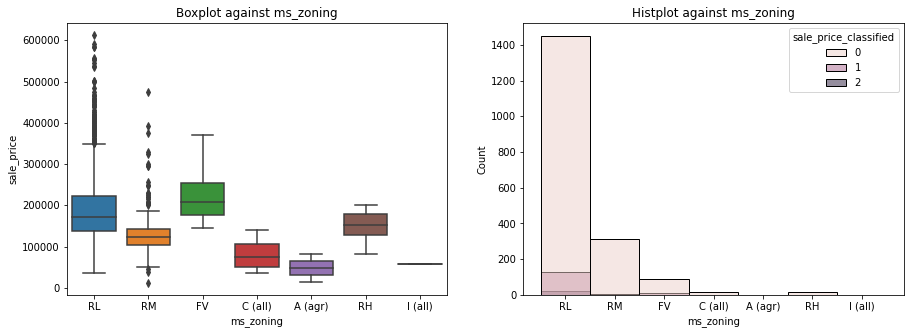

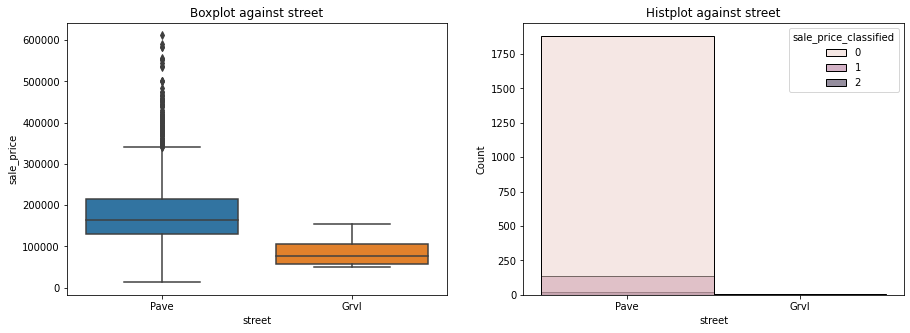

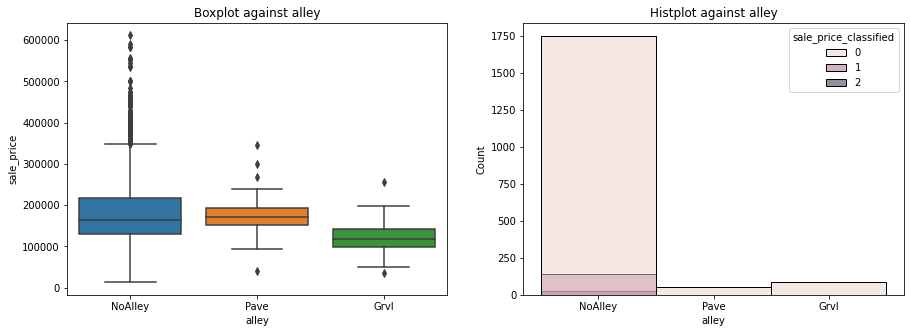

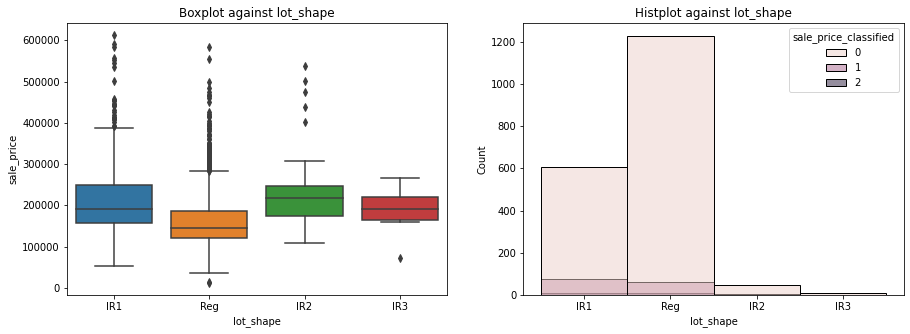

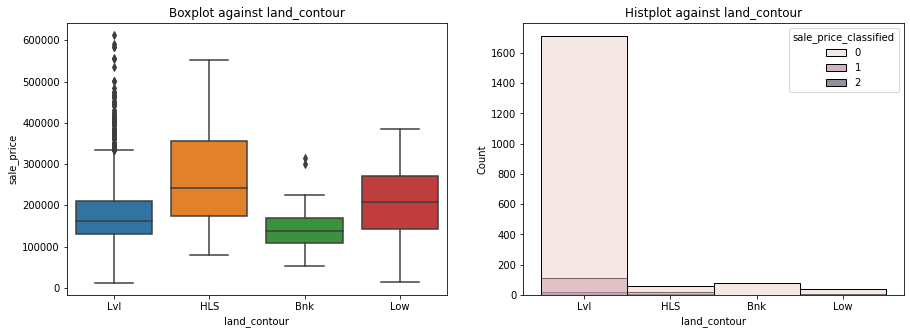

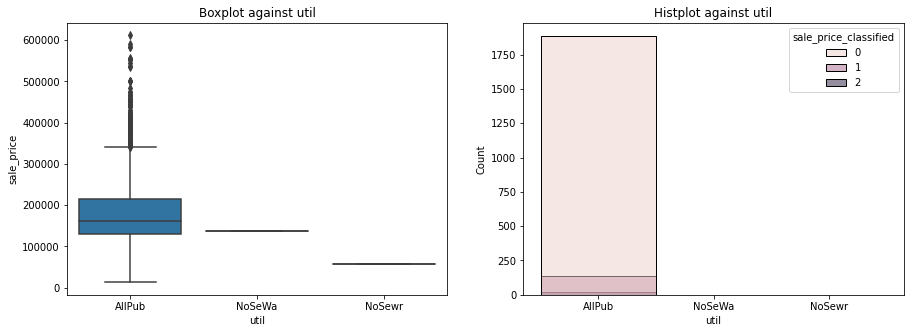

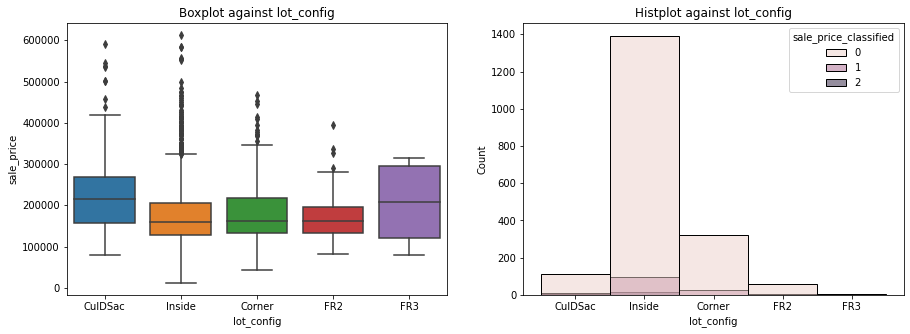

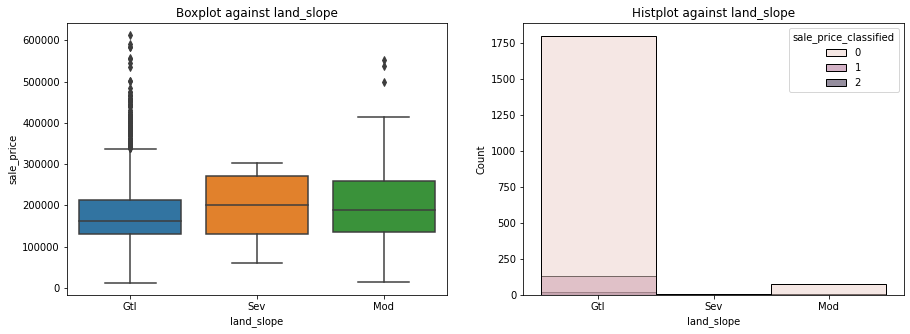

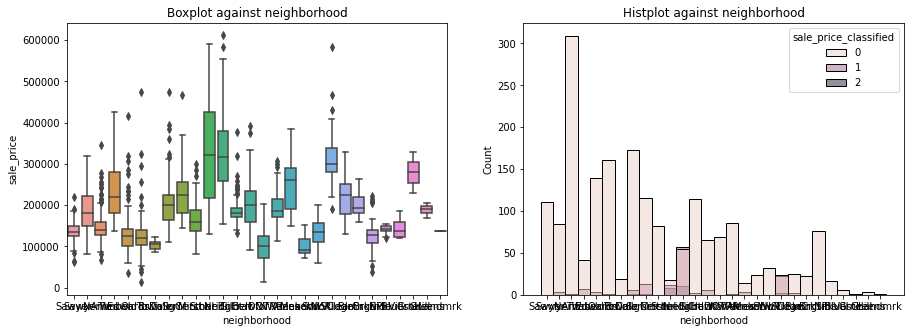

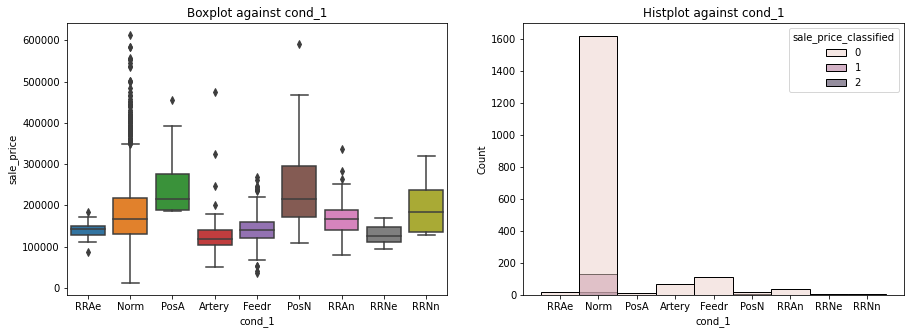

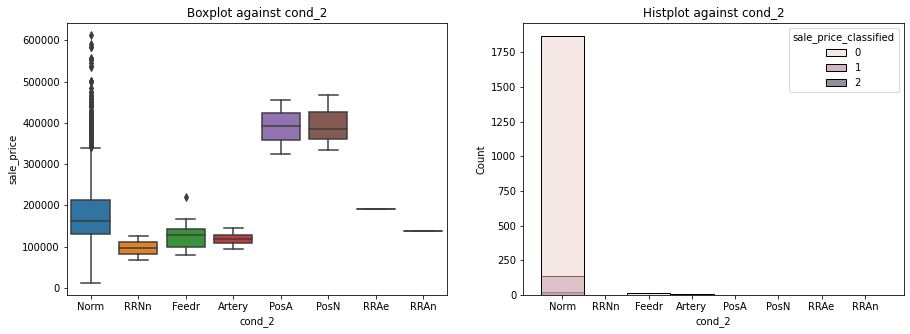

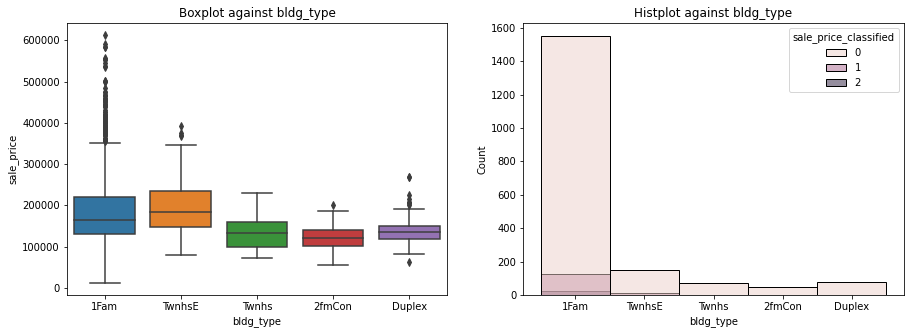

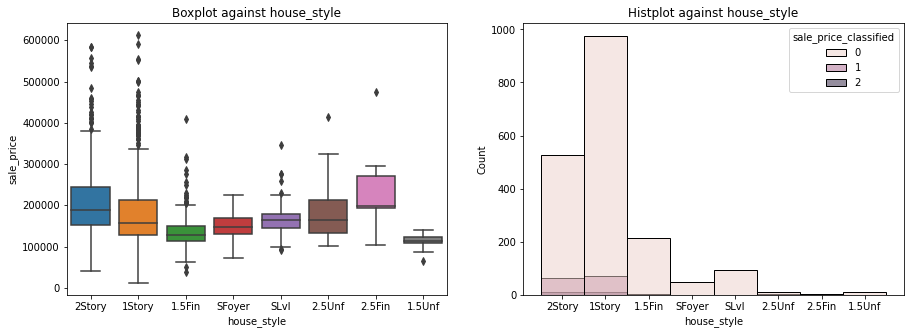

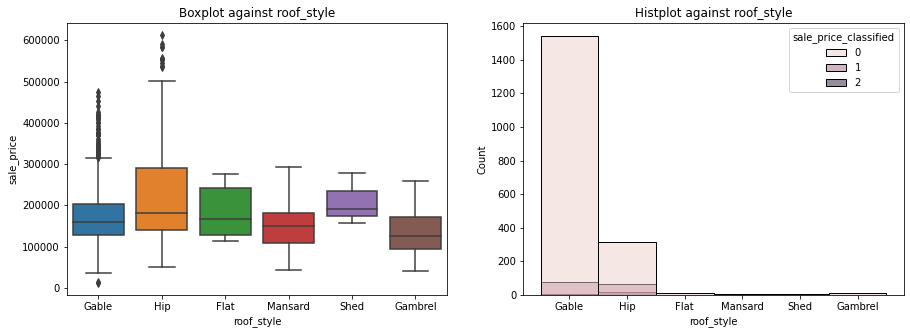

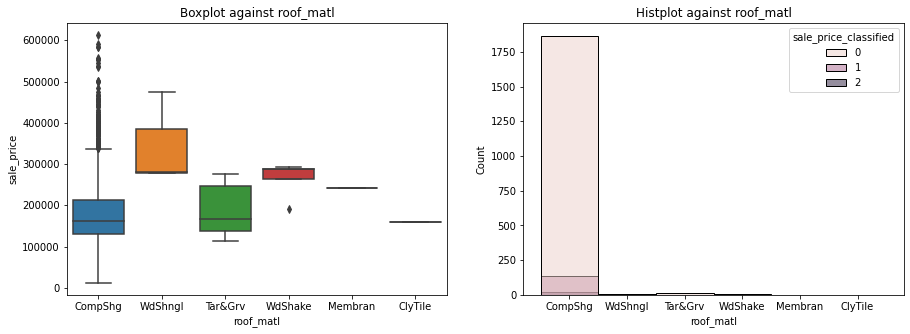

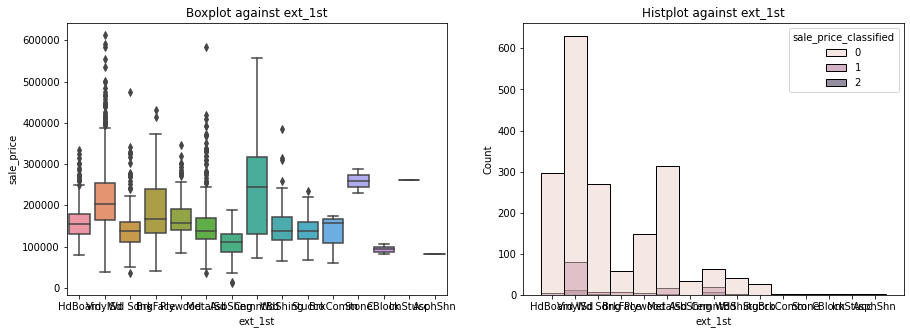

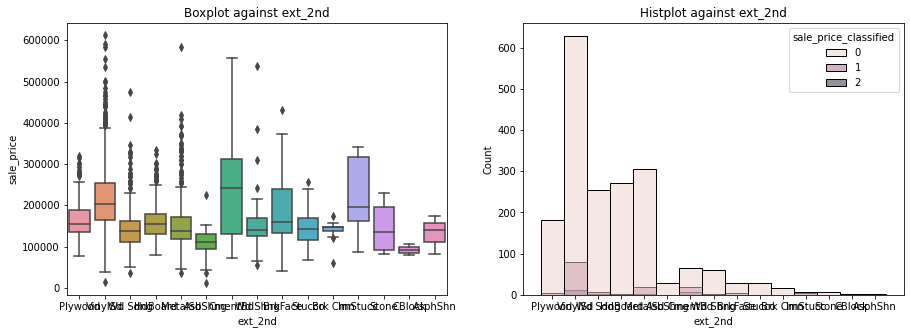

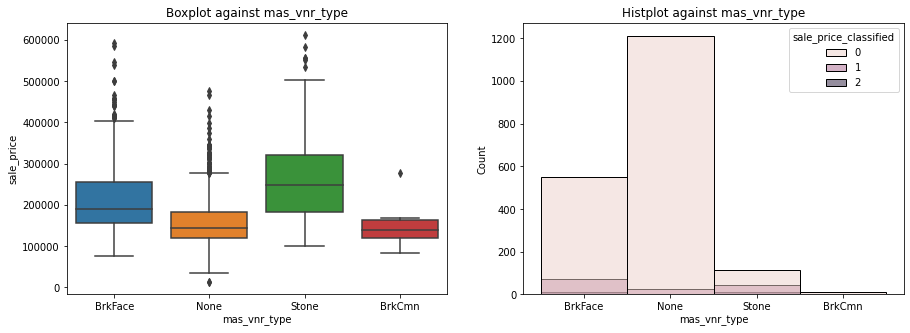

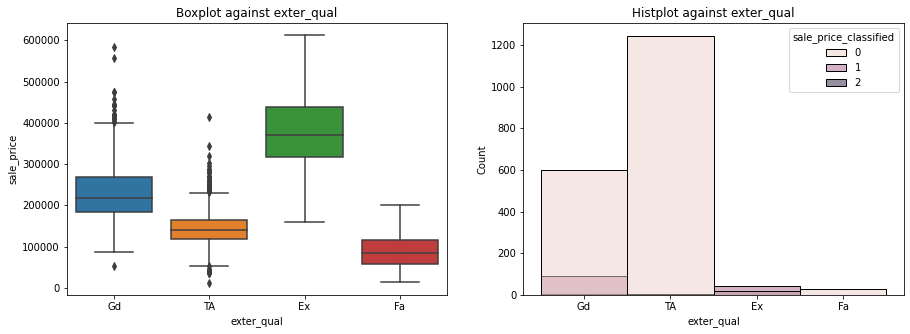

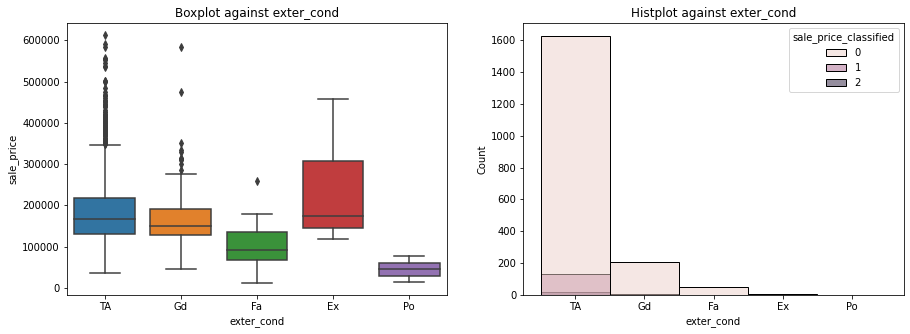

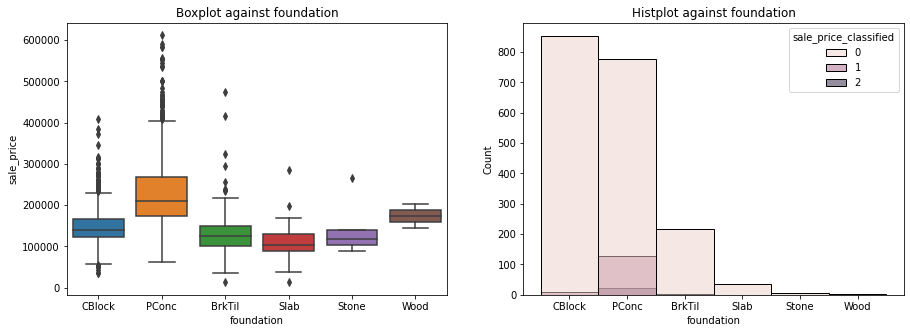

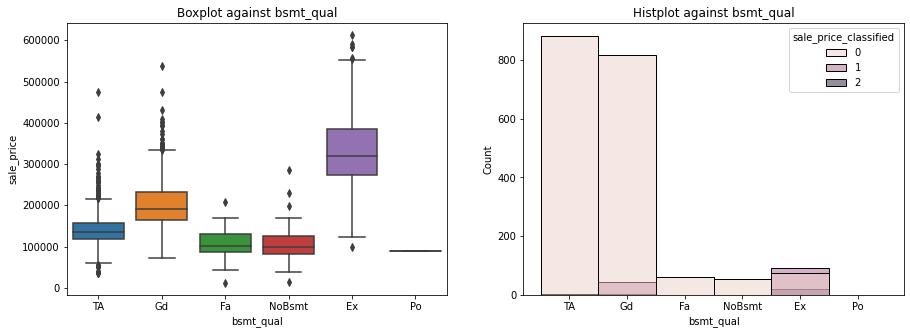

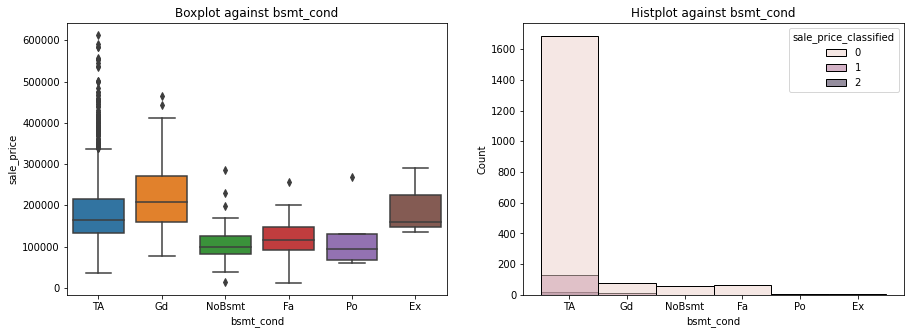

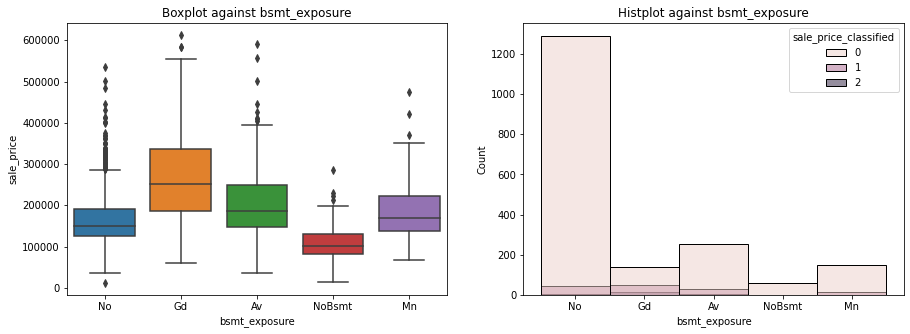

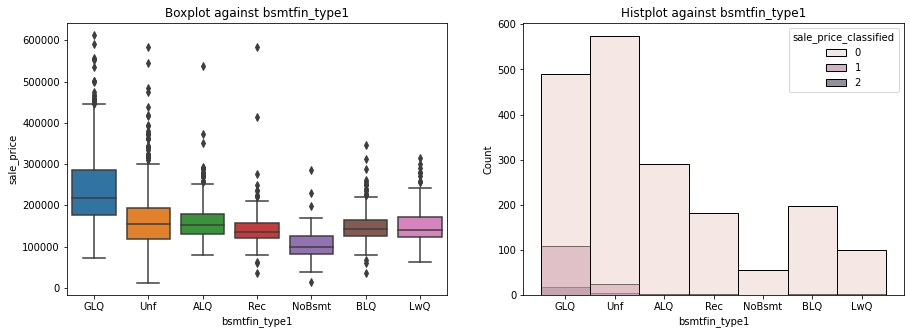

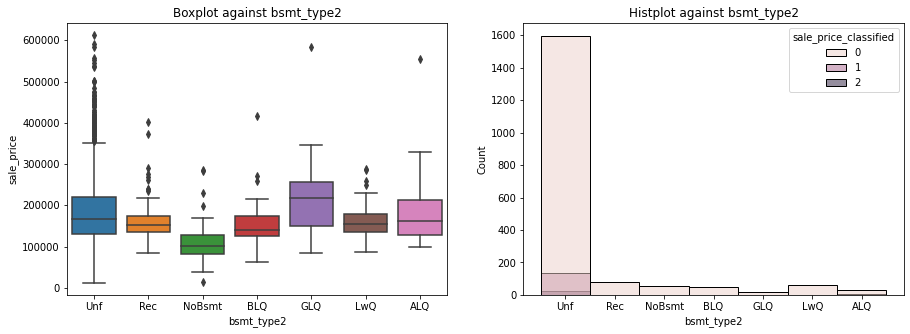

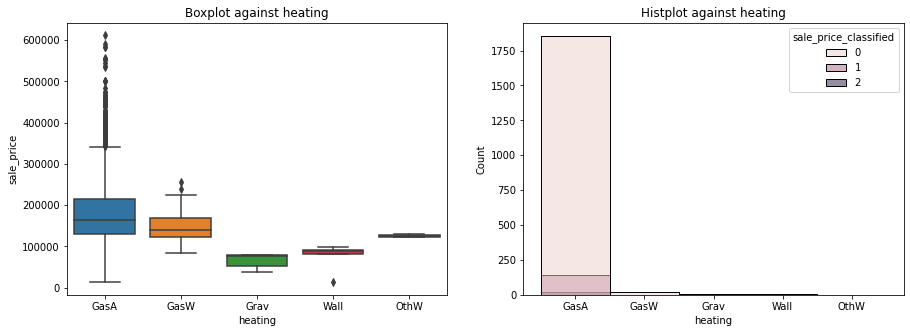

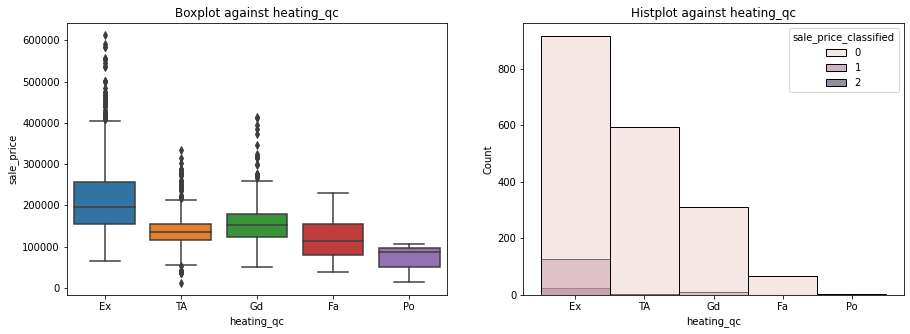

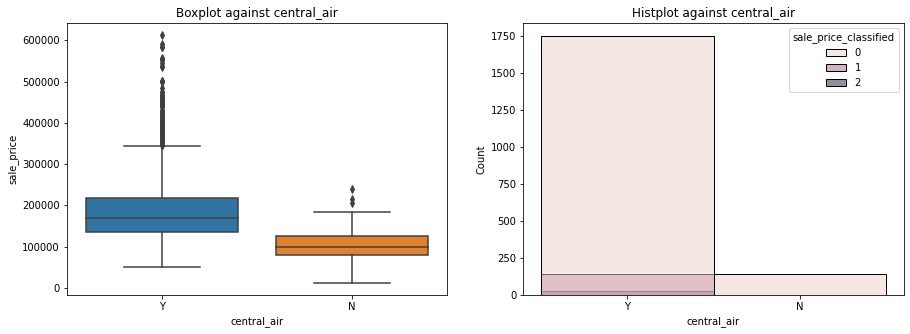

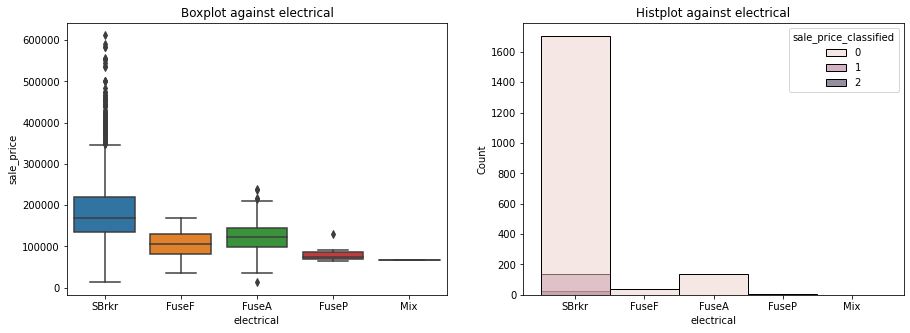

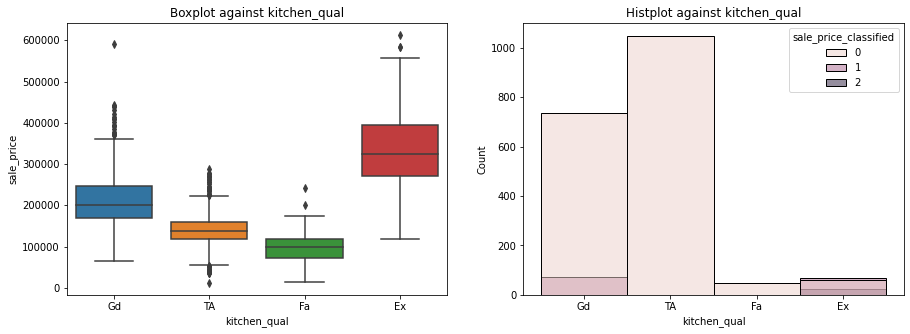

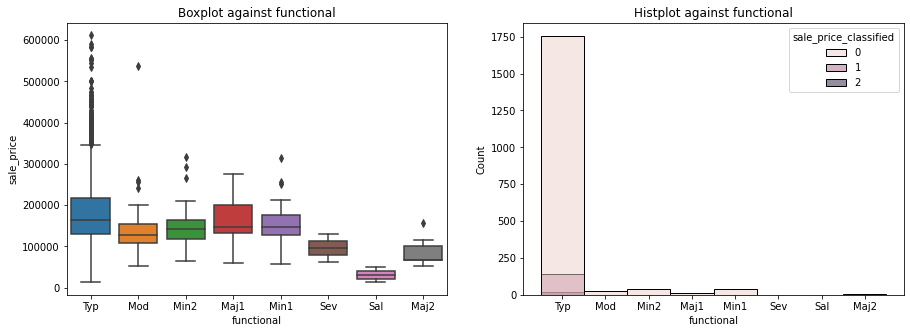

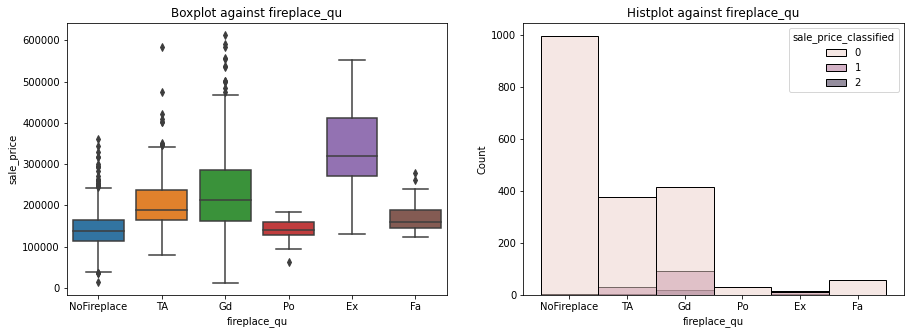

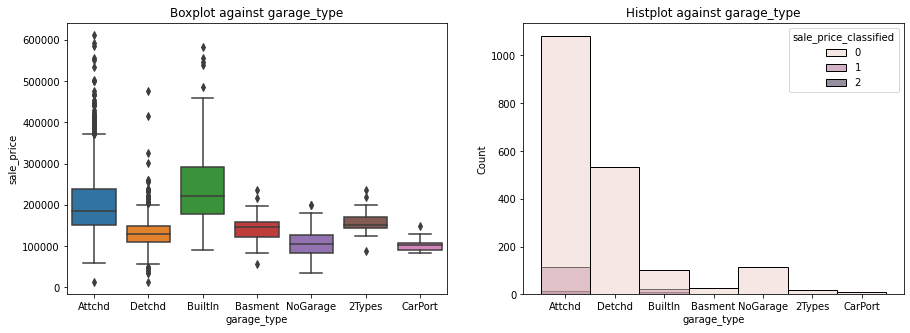

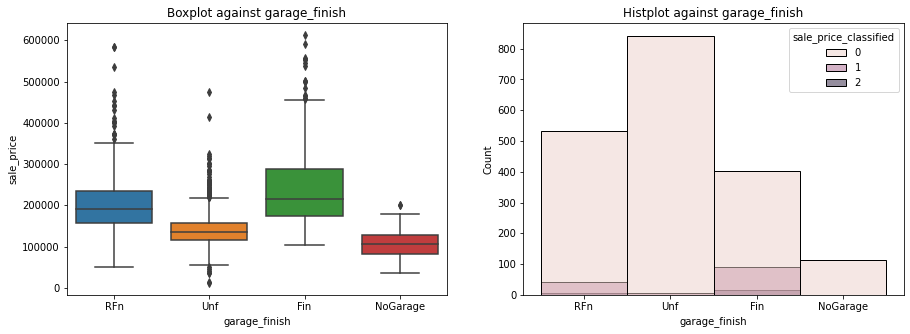

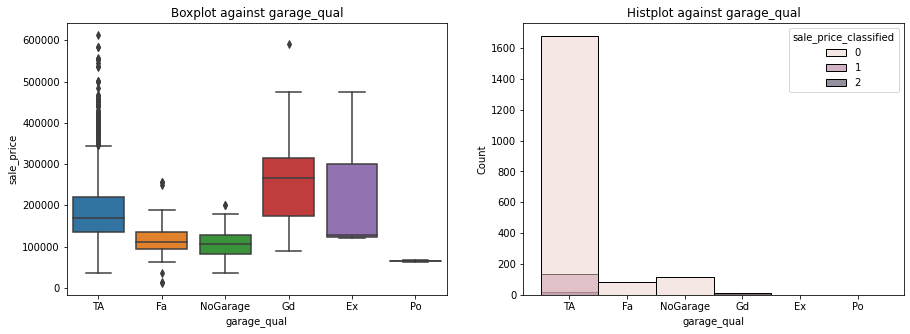

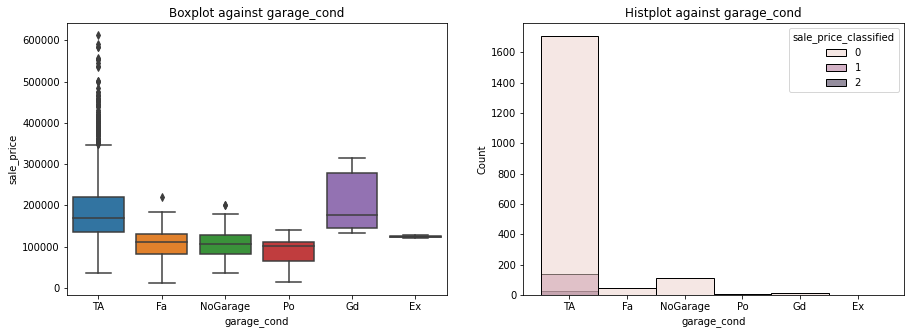

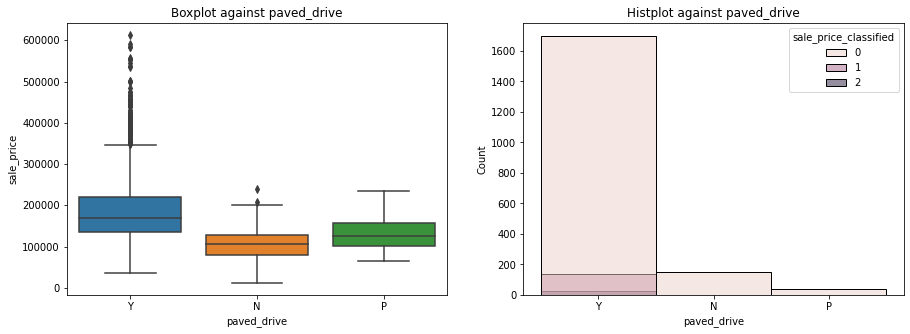

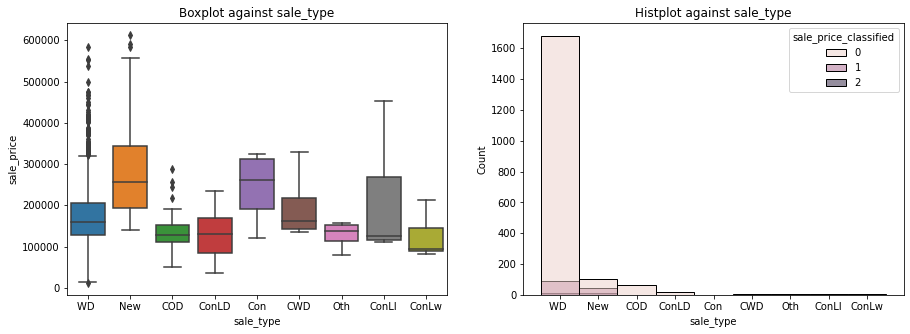

In [ ]:
cat = [col for col in df.columns if df[col].dtype == 'O']

for var in cat:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.boxplot(ax = axes[0], x = var, y = 'sale_price', data = df.iloc[:indexer])
    axes[0].set_title(f'Boxplot against {var}')
    
    sns.histplot(ax = axes[1], x = var, hue = 'sale_price_classified', data = df.iloc[:indexer])
    axes[1].set_title(f'Histplot against {var}')

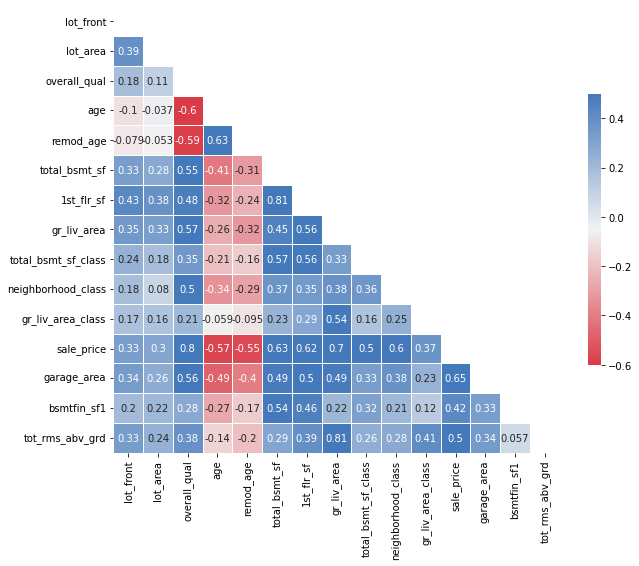

In [ ]:
# to filter out dummycolumns 
main_variables = ['lot_front', 'lot_area', 'overall_qual', 'age', 'remod_age',
 'exter_qual', 'bsmt_qual', 'heating_qc', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area',
 'kitchen_qual', 'garage_finish', 'fireplace_qu', 'total_bsmt_sf_class', 'neighborhood_class', 'gr_liv_area_class',
    'sale_price','garage_area','bsmtfin_sf1','tot_rms_abv_grd' ]

temp_final = df.iloc[:indexer][main_variables]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(temp_final.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(temp_final.corr(), mask=mask, cmap=cmap, vmax=0.5,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot = True);

In [ ]:
# creating matrix for all feature correlations 
matrix = df.corr().abs()
sol = (matrix.where(np.triu(np.ones(matrix.shape), k=1)
                  .astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
# Convert to dataframe and reset multi-level index
corr_df_2 = pd.DataFrame(sol.head(20)).reset_index()

# Rename columns
corr_df_2.columns = 'feat_1', 'feat_2', 'pair_corr'


def corr_target(row):
    row['feat_1_sales_corr'] = df.corr()['sale_price'][row['feat_1']]
    row['feat_2_sales_corr'] = df.corr()['sale_price'][row['feat_2']]
    return row

corr_df_2 = corr_df_2.apply(corr_target, axis=1)

# to identify pairwise relationship that has similar impact against sale_price 
# mainly --> garag_cars, 2nd_flr_sf, tot_rms_abv_grd,bsmt_full_bath, half_bath, full_bath

corr_df_2[(((corr_df_2['feat_1_sales_corr'] > 0) & (corr_df_2['feat_2_sales_corr'] > 0)) & (corr_df_2['pair_corr'] > 0.2) \
         & ((corr_df_2['feat_1']!= 'sale_price')&(corr_df_2['feat_2']!= 'sale_price')))]

C:\Users\Admin\AppData\Local\Temp/ipykernel_10020/3209824055.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  .astype(np.bool))


,feat_1,feat_2,pair_corr,feat_1_sales_corr,feat_2_sales_corr
0,garag_cars,garage_area,0.889558,0.648128,0.650246
1,gr_liv_area,tot_rms_abv_grd,0.808174,0.697038,0.504014
3,total_bsmt_sf,1st_flr_sf,0.798801,0.629303,0.618486
6,bedroom_abv_gr,tot_rms_abv_grd,0.673442,0.137067,0.504014
7,2nd_flr_sf,gr_liv_area,0.654530,0.248452,0.697038
10,bsmtfin_sf1,bsmt_full_bath,0.640606,0.423856,0.283332
11,gr_liv_area,full_bath,0.629736,0.697038,0.537969
15,2nd_flr_sf,half_bath,0.611432,0.248452,0.283001
17,overall_qual,garag_cars,0.598912,0.800207,0.648128
19,2nd_flr_sf,tot_rms_abv_grd,0.584059,0.248452,0.504014


**Variables not to use/may not use**

id, pid --> no relevance 

ms_subclass, ms_zoning, cond1, cond2, bldg_type,house_style, overall_cond, ext_1st, ext_2nd, mas_vnr_type,mas_vnr_area
bsmt_cond, bsmt_exposure, bsmt_unf_sf, low_qual_fin_sf, bsmt_full_bath,  bsmt_half_bath, 
bedroom_abv_grd, kitchen_abv_grd , open_porch_sf, wood_deck_sf, 
--> overlaps with higher sale price, nt in order, hence not good 

2nd_flr_sf, tot_rms_abv_grd,bsmt_full_bath, half_bath, full_bath, 
--> pairwise relationships, do not need to include 

pave, no alley, lot shape, land_cotour,util, lot_config, land_slope,roof_style, roof_matl,exter_cond,foundation, 
bsmtfin_type1, bsmt_type2, bsmt_sf2, heating, central_air, electrical, paved_drive, 
->> majority classified under low sale price, which may skew predicted price lower 

bsmtfin_sf1 --> good distribution against sale price clsuter, but having cluster even at near zero with high sale price

**Variables to use as main**

1) lot_front -> distribution is clear against sale price

2) lot_area -> distribution is clear against sale price, but need to take care of above 20000

3) Neighbourhood --> can see clusters of higher cost housing in certain areas

4) Overall_qual --> positively correlated to ordinal cat against sale price

5) year_built --> the latest it was built in, the higher the price, need to watch for cluster after year 2000

6) year_removd_add --> the latest it was built in, the higher the price, need to watch for cluster after year 2000

7) exter_qual --> positively correlated to ordinal cat against sale price, cluster in EX

8) bsmt_qual --> positively correlated to ordinal cat against sale price, cluster in EX

9) heating_qc --> most high end sale price are in ex, need watch for cluster at ex with normal sale price. 
              --> can consider interaction terms with other quals to be more accurate for higher selling price
              
              
10) total_bsmt_sf --> distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

11) 1st_flor_sf -->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

12) gv_liv_area-->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

13) kitchen_qual -->  distribution is clear against sale price, need to create categorical separate by 3 sale groups for interactions 

14) garage_finish --> ordinal cat matches with sales prices. 

15) fireplace_qu -> ordinal cat matches with sales prices.

16) Garage area -> strong correlation 

17) bsmtfin_sf1 -> strong correlation to price 

### Add weight on ordinal categories 

In [ ]:
ordinal_cat = ['lot_shape','util','land_slope','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure',
               'bsmtfin_type1','bsmt_type2','electrical','kitchen_qual','functional','fireplace_qu','garage_finish',
               'garage_qual','garage_cond','paved_drive','overall_cond','heating_qc'
]

In [ ]:
for cat in ordinal_cat:
    print(cat,df[cat].unique())

lot_shape ['IR1' 'Reg' 'IR2' 'IR3']
util ['AllPub' 'NoSeWa' 'NoSewr']
land_slope ['Gtl' 'Sev' 'Mod']
exter_qual ['Gd' 'TA' 'Ex' 'Fa']
exter_cond ['TA' 'Gd' 'Fa' 'Ex' 'Po']
bsmt_qual ['TA' 'Gd' 'Fa' 'NoBsmt' 'Ex' 'Po']
bsmt_cond ['TA' 'Gd' 'NoBsmt' 'Fa' 'Po' 'Ex']
bsmt_exposure ['No' 'Gd' 'Av' 'NoBsmt' 'Mn']
bsmtfin_type1 ['GLQ' 'Unf' 'ALQ' 'Rec' 'NoBsmt' 'BLQ' 'LwQ']
bsmt_type2 ['Unf' 'Rec' 'NoBsmt' 'BLQ' 'GLQ' 'LwQ' 'ALQ']
electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
kitchen_qual ['Gd' 'TA' 'Fa' 'Ex' 'Po']
functional ['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
fireplace_qu ['NoFireplace' 'TA' 'Gd' 'Po' 'Ex' 'Fa']
garage_finish ['RFn' 'Unf' 'Fin' 'NoGarage']
garage_qual ['TA' 'Fa' 'NoGarage' 'Gd' 'Ex' 'Po']
garage_cond ['TA' 'Fa' 'NoGarage' 'Po' 'Gd' 'Ex']
paved_drive ['Y' 'N' 'P']
overall_cond [8 5 7 6 3 9 2 4 1]
heating_qc ['Ex' 'TA' 'Gd' 'Fa' 'Po']


In [ ]:
# write temporary csv for feature engineering manipulation 
df.to_csv('temp.csv')

In [ ]:
# defining a function to return rate
def rate_Po_Excellent(col): 
    rate_dict = {'NoBsmt': 0,'NoFireplace': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5,
                 'Gtl':3, 'Sev':1, 'Mod':2,
                'IR1':3, 'Reg':4, 'IR2':2, 'IR3':1,
                'AllPub':3, 'NoSeWa':1, 'NoSewr':2,
                'No':1, 'Gd':4, 'Av':3, 'Mn':2,
                'NoGarage':0, 'Unf': 1, 'RFn': 2, 'Fin': 3,
                'SBrkr':5, 'FuseF':3,'FuseA':4, 'FuseP':2, 'Mix':1,
                'Typ':8, 'Mod':5, 'Min2':6, 'Maj1':4, 'Min1':7, 'Sev':2, 'Sal':1, 'Maj2':3,
                'Y':3, 'N':1, 'P':2,
                 'Unf':1 , 'Rec':3 , 'NoBsmt':0 , 'BLQ':4 , 'GLQ':6 , 'LwQ':2 , 'ALQ':5 ,
                }

    return rate_dict[col]

In [ ]:
for cat in ordinal_cat:
    if cat != 'overall_cond':
        df[cat] = df[cat].map(rate_Po_Excellent)
        print(cat,df[cat].unique())
    else:
        print(cat,df[cat].unique())

lot_shape [3 4 2 1]
util [3 1 2]
land_slope [3 2 5]
exter_qual [4 3 5 2]
exter_cond [3 4 2 5 1]
bsmt_qual [3 4 2 0 5 1]
bsmt_cond [3 4 0 2 1 5]
bsmt_exposure [1 4 3 0 2]
bsmtfin_type1 [6 1 5 3 0 4 2]
bsmt_type2 [1 3 0 4 6 2 5]
electrical [5 3 4 2 1]
kitchen_qual [4 3 2 5 1]
functional [8 5 6 4 7 2 1 3]
fireplace_qu [0 3 4 1 5 2]
garage_finish [2 1 3 0]
garage_qual [3 2 0 4 5 1]
garage_cond [3 2 0 1 4 5]
paved_drive [3 1 2]
overall_cond [8 5 7 6 3 9 2 4 1]
heating_qc [5 3 4 2 1]


In [ ]:
area_only = ['lot_front', 'lot_area','total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'sale_price']

main_variables = ['lot_front', 'lot_area', 'overall_qual', 'age', 'remod_age',
 'exter_qual', 'bsmt_qual', 'heating_qc', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area',
 'kitchen_qual', 'garage_finish', 'fireplace_qu', 'total_bsmt_sf_class', 'neighborhood_class', 'gr_liv_area_class',
    'sale_price','garage_area','bsmtfin_sf1','tot_rms_abv_grd' ]

other_columns = [col for col in df.columns if (col not in main_variables) & (col not in ['index','id','pid']) & (col not in ordinal_cat)]



In [ ]:
# Change other columns to get dummies for cat features

other_df = df.copy()[other_columns]

other_cat_features = [col for col in other_df.columns if df[col].dtype == 'O']
other_numerical_features = [col for col in other_df.columns if df[col].dtype != 'O']


other_cat = pd.get_dummies(data = other_df[other_cat_features], drop_first = True)
other_num = other_df[other_numerical_features]

other_df = pd.concat([other_num,other_cat], axis = 1)

In [ ]:
# writing other df
other_df.to_csv('other_df.csv')

In [ ]:
# main data to do faeture engineering 
main_data = df.copy()
main_data = main_data[main_variables]

In [ ]:
# writing main_data and combi with other_df

id_adder = df['id']
main_data = pd.concat([id_adder,main_data], axis = 1)

sale_price             1.000000
overall_qual           0.800207
exter_qual             0.712146
gr_liv_area            0.697038
kitchen_qual           0.692336
garage_area            0.650246
total_bsmt_sf          0.629303
1st_flr_sf             0.618486
bsmt_qual              0.612188
neighborhood_class     0.599694
garage_finish          0.557839
fireplace_qu           0.538925
tot_rms_abv_grd        0.504014
total_bsmt_sf_class    0.501318
heating_qc             0.458354
bsmtfin_sf1            0.423856
gr_liv_area_class      0.372024
lot_front              0.325850
lot_area               0.296566
remod_age             -0.551716
age                   -0.571881
Name: sale_price, dtype: float64

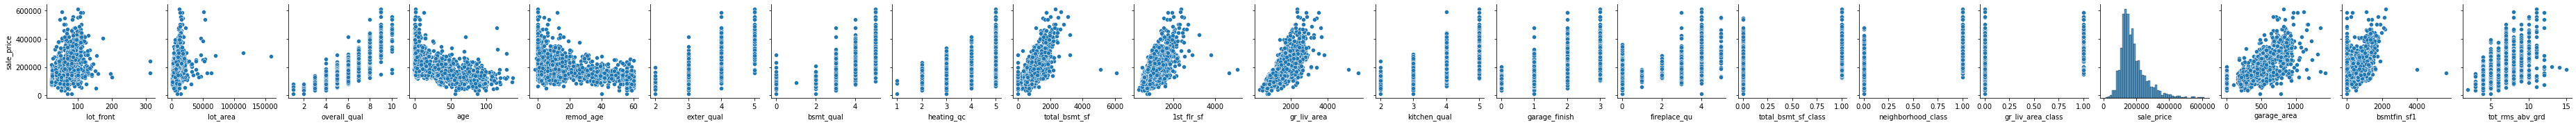

In [ ]:
# generally can see same two outlier for continuous categories 

sns.pairplot(
    x_vars = main_variables,
    y_vars = 'sale_price',
    data = main_data

)
main_data[main_variables].corr()['sale_price'].sort_values(ascending = False)

,id,lot_front,lot_area,overall_qual,age,remod_age,exter_qual,bsmt_qual,heating_qc,total_bsmt_sf,...,kitchen_qual,garage_finish,fireplace_qu,total_bsmt_sf_class,neighborhood_class,gr_liv_area_class,sale_price,garage_area,bsmtfin_sf1,tot_rms_abv_grd
960,1499,313.0,63887,10,0,0,5,5,5,6110.0,...,5,3,4,1,0,1,160000.0,1418.0,5644.0,12
1885,2181,128.0,39290,10,-1,-2,5,5,5,5095.0,...,5,3,4,1,0,1,183850.0,1154.0,4010.0,15


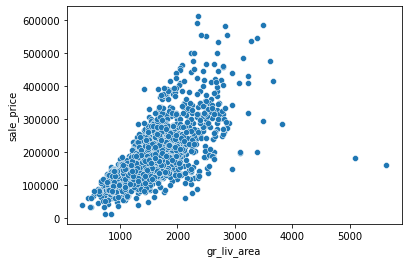

In [ ]:
# check outlier --> remove after concat with other variables 

sns.scatterplot(
    x = 'gr_liv_area',
    y = 'sale_price',
    data = main_data
)

# observed two outliers --> will check if outlier affects linear regression later

main_data[main_data['gr_liv_area'] > 5000]

In [ ]:
# orginal test format
kaggle_test

,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


In [ ]:
# split test data (Kaggle)
# cross check -->> OK

kaggle_test_final = main_data[2051:]
kaggle_test_final = kaggle_test_final.reset_index(drop = 'index')
kaggle_test_final['sale_price']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
873   NaN
874   NaN
875   NaN
876   NaN
877   NaN
Name: sale_price, Length: 878, dtype: float64

In [ ]:
# checked all rows are in line with original test data after split 
len(((kaggle_test_final['id']+kaggle_test['id'])/2) == kaggle_test['id'])

878

In [ ]:
# split train data (Kaggle)

kaggle_train_final = main_data[:2051]
kaggle_train_final['sale_price'].tail(10)

2041    412500.0
2042     83000.0
2043    128000.0
2044    182000.0
2045    394617.0
2046    298751.0
2047     82500.0
2048    177000.0
2049    144000.0
2050    189000.0
Name: sale_price, dtype: float64

## Pre - processing

**Apply Standard Scaler**

In [ ]:
# assign X and y

X = kaggle_train_final.drop(columns = ['sale_price','id'])
y = kaggle_train_final['sale_price']
indices = X.index.values

# Create train/test splits.
X_train, X_test, y_train, y_test,indices_train, indices_test = train_test_split(
    X,
    y,
    indices,
    test_size=0.3,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Modelling

**Linear Regression - First pass**

In [ ]:
lr = LinearRegression()

lr.fit(X_train,y_train)

# cross val mse
cross_score = - cross_val_score(
    lr,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lr.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

MSE for train: 957412251.869823
MSE for test: 1033497992.6933364
Overfitted by: -76085740.82351339
RMSE: 32148.063591658774


Text(27.125, 0.5, 'Actual Sale Price')

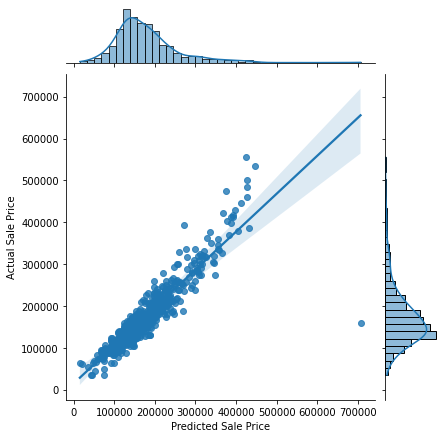

In [ ]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax = sns.jointplot(
    x = lr.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax.ax_joint.set_xlabel('Predicted Sale Price')
ax.ax_joint.set_ylabel('Actual Sale Price')

In [ ]:
# find out index 339 having anomaly 
anomaly = [num for num,val in enumerate (lr.predict(X_test)>600000) if val == True]
anomaly[0]

339

In [ ]:
#index with anomoly
indices_test[anomaly[0]]

960

In [ ]:
outlier_val = int(main_data.loc[main_data['sale_price'].index == indices_test[anomaly[0]], 'sale_price'].values)

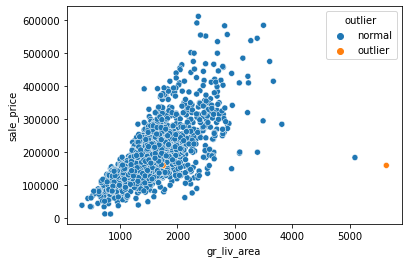

In [ ]:
# copy to filter off outlier in scatterplot

filter_outlier = main_data.copy()

filter_outlier['outlier'] = filter_outlier['sale_price'].map(lambda x: 'outlier' if (x == outlier_val) else 'normal')

# found two outliers with one already found 

sns.scatterplot(
    x = 'gr_liv_area',
    y = 'sale_price',
    data = filter_outlier,
    hue = 'outlier'
);

In [ ]:
# found two outliers 
main_data[filter_outlier['gr_liv_area'] > 5000]

,id,lot_front,lot_area,overall_qual,age,remod_age,exter_qual,bsmt_qual,heating_qc,total_bsmt_sf,...,kitchen_qual,garage_finish,fireplace_qu,total_bsmt_sf_class,neighborhood_class,gr_liv_area_class,sale_price,garage_area,bsmtfin_sf1,tot_rms_abv_grd
960,1499,313.0,63887,10,0,0,5,5,5,6110.0,...,5,3,4,1,0,1,160000.0,1418.0,5644.0,12
1885,2181,128.0,39290,10,-1,-2,5,5,5,5095.0,...,5,3,4,1,0,1,183850.0,1154.0,4010.0,15


In [ ]:
# drop two outliers from train data set 
main_data.drop(index = [960,1885], inplace = True)

**Redo pre-processing**

In [ ]:
# reassign test_train data  

kaggle_test_final = main_data[2049:]
kaggle_test_final = kaggle_test_final.reset_index(drop = 'index')

kaggle_train_final = main_data[:2049]


In [ ]:
# assign X and y

X = kaggle_train_final.drop(columns = ['sale_price','id'])
y = kaggle_train_final['sale_price']
indices = X.index.values

# Create train/test splits.
X_train, X_test, y_train, y_test,indices_train, indices_test = train_test_split(
    X,
    y,
    indices,
    test_size=0.3,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

**Redo Linear regression - Filtered off outlier**

In [ ]:
lr = LinearRegression()

lr.fit(X_train,y_train)

# cross val mse
cross_score = - cross_val_score(
    lr,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test_2 = mean_squared_error(
    y_test,
    lr.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test_2

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test_2}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test_2}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test_2**0.5}')

MSE for train: 758209124.1969627
MSE for test: 545653696.9353434
Underfited by: 212555427.26161933
RMSE: 23359.231514228875


Text(27.125, 0.5, 'Actual Sale Price')

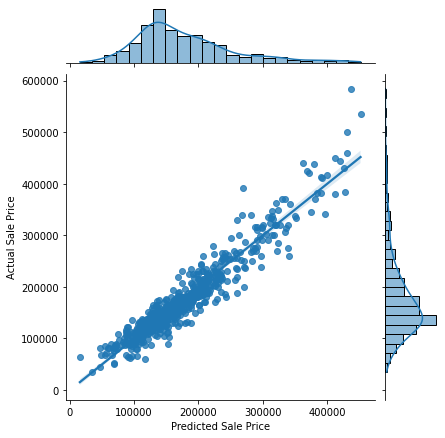

In [ ]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax = sns.jointplot(
    x = lr.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax.ax_joint.set_xlabel('Predicted Sale Price')
ax.ax_joint.set_ylabel('Actual Sale Price')

In [ ]:
# **MSE improvement**
print(f'Current rmse = {mse_test_2**0.5}')
print(f'mse difference = {mse_test - mse_test_2}')
print(f'% diff = {round((((mse_test_2- mse_test)/mse_test))*100,2)}%')

Current rmse = 23359.231514228875
mse difference = 487844295.757993
% diff = -47.2%


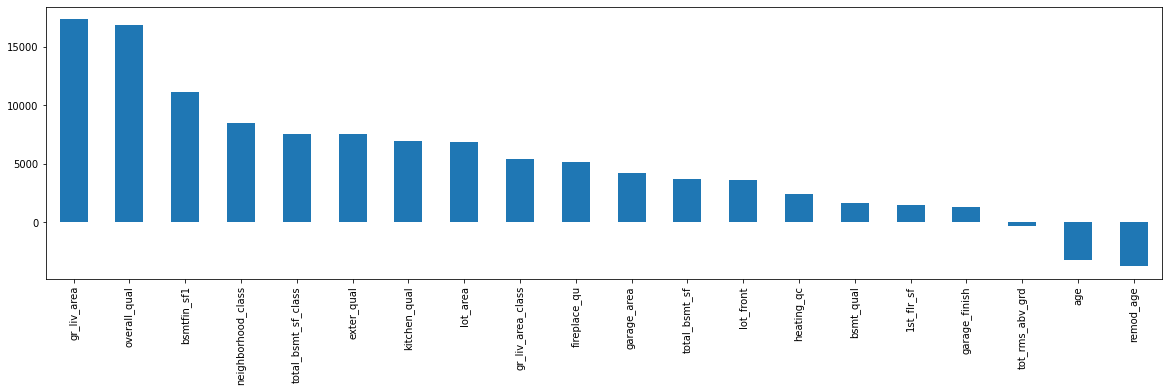

In [ ]:
# to plot the series to rank variables 
plt.figure(figsize=(20,5))

col = kaggle_train_final.columns.drop(['sale_price','id'])
pd.Series(lr.coef_, index = col).sort_values(ascending = False).plot.bar();

In [ ]:
main_data.to_csv('Main_data.csv')
main_data_1 = pd.concat([main_data, other_df], axis = 1)
main_data_1.to_csv('Main_with_other_df.csv')